<a href="https://colab.research.google.com/github/shreya139/MiningMavericks/blob/Dhruvi-Kotecha/202218009_Data_Mining_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

# **2. About Dataset**
## **2010 New York State Hospital Inpatient Discharge Data**
### Detailed Characteristics, Diagnoses, Treatments and Payments
### By Health Data New York

### **Dataset Dictionary**
**Health Service Area:**	Geographic region of the hospital. (String)

**Hospital County:**	County in which the hospital is located. (String)

**Operating Certificate Number:**	Unique identifier for hospitals. (Integer)

**Facility Name:**	Name of the hospital. (String)

**Age Group:**	Age group of the patient. (String)

**Zip Code - 3 digits:**	First three digits of the patient's zip code. (Integer)

**Gender:**	Gender of the patient. (String)  

**Race:**	Race of the patient. (String)

**Ethnicity:**	Ethnicity of the patient. (String)

**Length of Stay:**	Length of stay for the patient. (Integer)

**Type of Admission:**	Type of admission for the patient. (String)

**Patient Disposition:**	Disposition of the patient. (String)

**Discharge Year:**	Year of the patient's discharge. (Integer)

**CCS Diagnosis Code:**	Clinical Classification Software (CCS) diagnosis code for the patient. (Integer)

**CCS Diagnosis Description:**	CCS Diagnosis Description. (String)

**CCS Procedure Code:**	CCS procedure code for the patient. (Integer)

**CCS Procedure Description:**	CCS Procedure Description. (String)

**APR DRG Code:**	All Patient Refined Diagnosis Related Group APR DRG Code. (Integer)

**APR DRG Description:**	APR DRG Description. (String)

**APR MDC Code:**	All Patient Refined Major Diagnostic Category APR MDC Code. (Integer)

**APR MDC Description:**	APR MDC Description. (String)

**APR Severity of Illness Code:**	APR Severity of Illness Code. (Integer)

**APR Severity of Illness Description:**	APR Severity of Illness Description. (String)

**APR Risk of Mortality:**	APR Risk of Mortality. (Integer)

**APR Medical Surgical Description:**	APR Medical Surgical Description. (String)

**Source of Payment 1:**	Source of Payment 1. (String)

**Source of Payment 2:**	Source of Payment 2

**Source of Payment 3:**	Source of Payment 3

In [42]:
# reading the csv file
discharge_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')

<ipython-input-42-8bcf434169e4>:2: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  discharge_data = pd.read_csv('/content/drive/MyDrive/Data_Mining_Datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


In [43]:
# copying discharge data to another dataset
data = discharge_data.copy()

## **Understanding the shape and columns of the dataset**

In [44]:
# there are 2622133 rows and 38 columns
data.shape

(2622133, 38)

In [45]:
# checking all the column names
data.columns

Index(['index', 'Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Source of Payment 2', 'Source of Payment 3',
       'Attending Provider License Number',
       'Operating Provider License Number', 'Other Provider License Number',
       'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [46]:
# describing information like datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [47]:
# checking the null values in all the columns
data.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [48]:
# calculating the percentage of missig values
missing_percentage = (data.isnull().sum() / len(data)) * 100

In [49]:
# checking the percentage of null values in all the columns
print(round(missing_percentage, 2))

index                                   0.00
Health Service Area                     0.19
Hospital County                         0.19
Operating Certificate Number            0.19
Facility ID                             0.19
Facility Name                           0.00
Age Group                               0.00
Zip Code - 3 digits                     0.12
Gender                                  0.00
Race                                    0.00
Ethnicity                               0.00
Length of Stay                          0.00
Type of Admission                       0.00
Patient Disposition                     0.00
Discharge Year                          0.00
CCS Diagnosis Code                      0.09
CCS Diagnosis Description               0.09
CCS Procedure Code                      0.09
CCS Procedure Description               0.09
APR DRG Code                            0.00
APR DRG Description                     0.00
APR MDC Code                            0.00
APR MDC De

In [50]:
# checking if there are any duplicate records in the dataset
data.duplicated().sum()

0

In [51]:
# viewing first 5 rows of the data
data.head()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [52]:
# summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2622133.0,1.311066e+06,7.569447e+05,0.00,655533.00,1311066.00,1966599.00,2622132.00
Operating Certificate Number,2617246.0,5.019051e+06,2.249577e+06,101000.00,2951001.00,5907002.00,7002002.00,7004010.00
Facility ID,2617246.0,1.036953e+03,6.448892e+02,1.00,541.00,1117.00,1450.00,9059.00
Discharge Year,2622133.0,2.010000e+03,0.000000e+00,2010.00,2010.00,2010.00,2010.00,2010.00
CCS Diagnosis Code,2619860.0,1.919431e+02,1.565932e+02,1.00,106.00,157.00,218.00,670.00
CCS Procedure Code,2619860.0,1.121324e+02,8.761224e+01,0.00,0.00,124.00,211.00,231.00
APR DRG Code,2622133.0,4.069629e+02,2.404910e+02,1.00,198.00,361.00,640.00,956.00
APR MDC Code,2622133.0,1.016206e+01,5.923678e+00,0.00,5.00,8.00,15.00,25.00
APR Severity of Illness Code,2622133.0,1.948373e+00,8.986120e-01,0.00,1.00,2.00,3.00,4.00
Attending Provider License Number,2617246.0,1.266323e+06,8.226220e+06,1.00,166659.00,205362.00,233561.00,90999999.00


In [53]:
# summary of the dataset including columns of object type
data.describe(include='object').T

,count,unique,top,freq
Health Service Area,2617246,8,New York City,1233121
Hospital County,2617246,57,Manhattan,445288
Facility Name,2622133,225,Mount Sinai Hospital,58696
Age Group,2622133,5,70 or Older,725253
Zip Code - 3 digits,2618932,78,112,236696
Gender,2622133,3,F,1477671
Race,2622133,4,White,1601378
Ethnicity,2622133,3,Not Span/Hispanic,2116780
Length of Stay,2622133,222,2,563044
Type of Admission,2622133,6,Emergency,1628999


# **3. Exploratory Data Analysis**

## **Univariate Analysis**

In [54]:
def plot_categorical_with_percentage(data, col):
    plt.figure(figsize=(15, 6))

    # Check the number of unique categories in the column
    unique_categories = data[col].nunique()

    if unique_categories > 8:
        # If there are more than 8 categories, select the first 8
        top_categories = data[col].value_counts().index[:8]
        filtered_data = data[data[col].isin(top_categories)]
    else:
        # If there are 8 or fewer categories, use all of them
        filtered_data = data

    ax = sns.barplot(x=filtered_data[col].value_counts().index, y=filtered_data[col].value_counts(normalize=True) * 100, palette='Paired')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha='right')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()


In [55]:
label_encoder = LabelEncoder()

**Target Column**

In [56]:
data['APR Medical Surgical Description'].value_counts()

Medical           2002344
Surgical           619548
Not Applicable        241
Name: APR Medical Surgical Description, dtype: int64

In [57]:
data = data[data['APR Medical Surgical Description'] != 'Not Applicable']

In [58]:
# Encoding 'APR Medical Surgical Description' column for Analysis

data['APR Medical Surgical Description'].replace('Medical',0,inplace=True)
data['APR Medical Surgical Description'].replace('Surgical',1,inplace=True)

<ipython-input-58-029991cb60f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['APR Medical Surgical Description'].replace('Medical',0,inplace=True)


In [59]:
# Function to plot stacked bar charts for categorical columns

def stacked_barplot(col):
    sns.set()

    # Dropping rows with 'Not Applicable' in the 'APR Medical Surgical Description' column
    data[data['APR Medical Surgical Description'] != '2']

    tab = pd.crosstab(col, data['APR Medical Surgical Description'], margins=True).sort_values(by=1, ascending=False)
    print(tab)
    print('-'*100)
    tab1 = pd.crosstab(col, data['APR Medical Surgical Description'], normalize='index').sort_values(by=1, ascending=False)

    # Extract top 8 categories
    top_8_categories = tab1.index[:8]
    tab1 = tab1.loc[top_8_categories]

    ax = tab1.plot(kind='bar', stacked=True, figsize=(15, 6))
    plt.xlabel(col.name, fontsize=15)
    plt.yticks(fontsize=13)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Optimizing x-axis ticks
    n = len(top_8_categories) // 8
    if n < 1:
        n = 1
    plt.xticks(range(0, len(top_8_categories), n), top_8_categories[::n], fontsize=13)

    plt.show()


### **1. Observation on Health Service Area**

In [60]:
# Check unique values and their counts
counts = data['Health Service Area'].value_counts()
print(counts)

New York City     1232942
Long Island        385255
Hudson Valley      273014
Western NY         185078
Capital/Adiron     179911
Central NY         170904
Finger Lakes       158601
Southern Tier       31300
Name: Health Service Area, dtype: int64


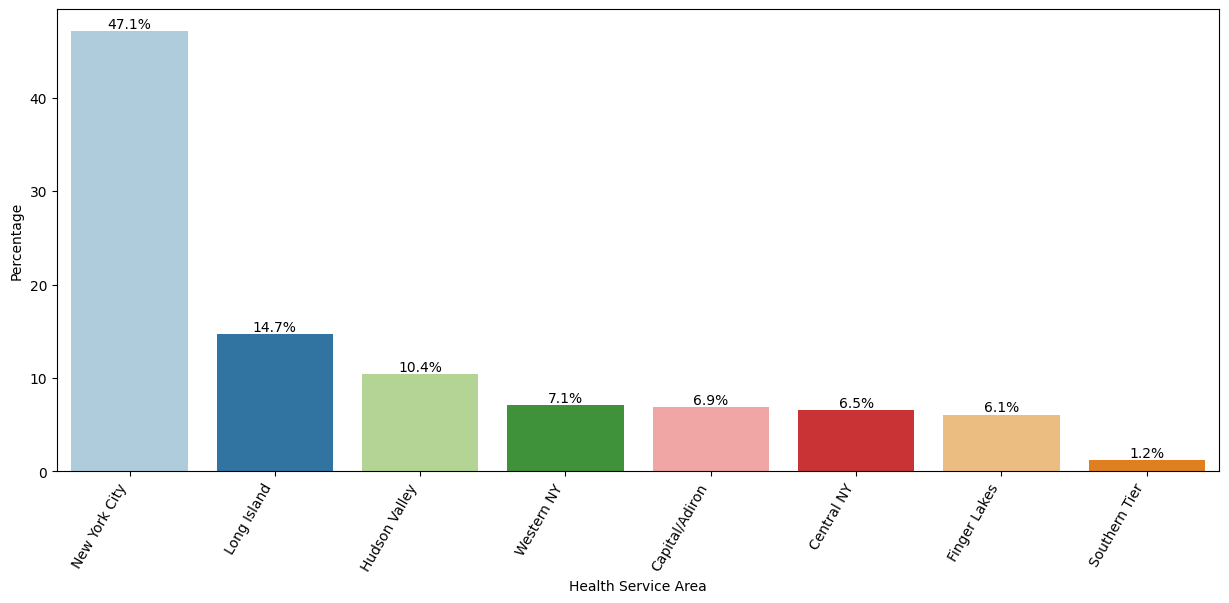

In [61]:
plot_categorical_with_percentage(data, 'Health Service Area')

APR Medical Surgical Description        0       1      All
Health Service Area                                       
All                               2000503  616502  2617005
New York City                      951563  281379  1232942
Long Island                        288083   97172   385255
Hudson Valley                      220116   52898   273014
Western NY                         136721   48357   185078
Finger Lakes                       114495   44106   158601
Capital/Adiron                     135914   43997   179911
Central NY                         130400   40504   170904
Southern Tier                       23211    8089    31300
----------------------------------------------------------------------------------------------------


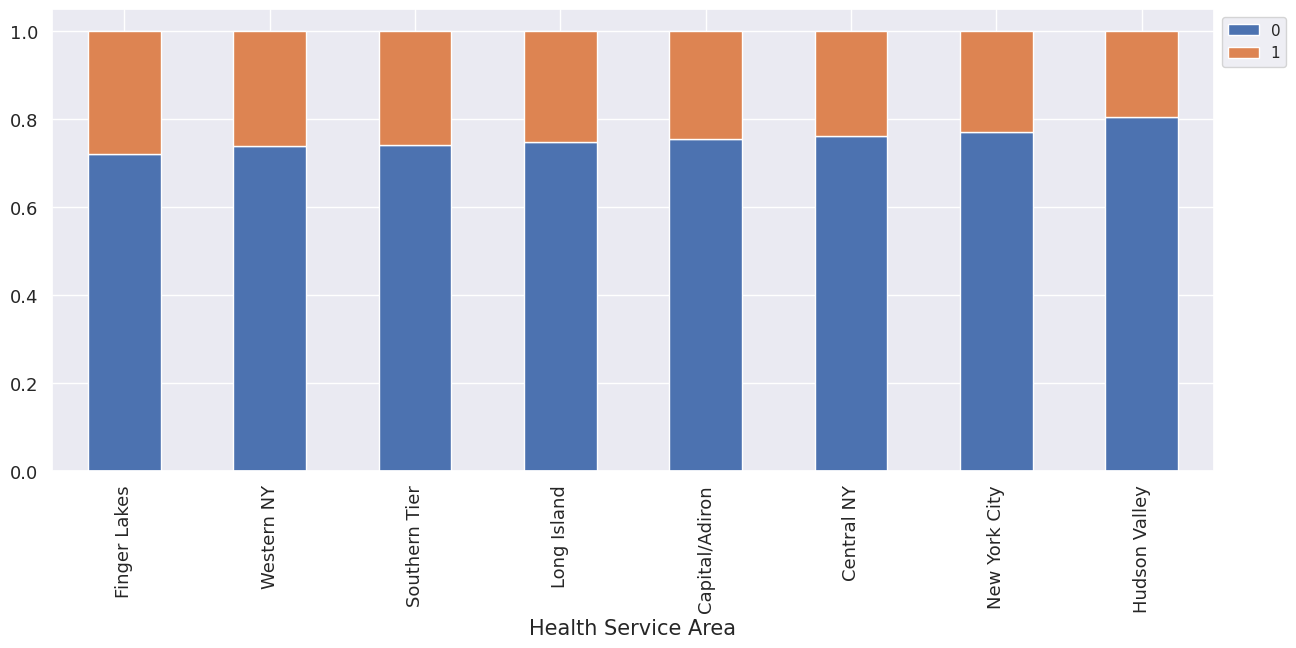

In [62]:
stacked_barplot(data['Health Service Area'])

In [63]:
# Drop rows with null values in the column
data = data.dropna(subset=['Health Service Area'])

In [64]:
data['Health Service Area'] = label_encoder.fit_transform(data['Health Service Area'])

data['Health Service Area'] = data['Health Service Area'].apply(pd.to_numeric)

In [65]:
data['Health Service Area'].dtype

dtype('int64')

### **2. Observation on Hospital County**

In [66]:
# Check unique values and their counts
counts = data['Hospital County'].value_counts()
print(counts)

Manhattan      445273
Kings          298113
Queens         221317
Nassau         215830
Bronx          204310
Suffolk        169425
Westchester    131933
Erie           129616
Monroe         109398
Onondaga        76286
Richmond        63929
Albany          62191
Orange          42950
Oneida          36454
Dutchess        35419
Rockland        34898
Broome          29078
Schenectady     22989
Niagara         21450
Chemung         17366
Warren          17134
Rensselaer      15622
Otsego          14305
Ulster          13933
St Lawrence     13600
Chautauqua      13462
Ontario         13057
Jefferson       12109
Clinton         11589
Saratoga         9930
Steuben          9678
Putnam           8093
Cattaraugus      7686
Montgomery       6995
Oswego           6758
Tompkins         6686
Franklin         6458
Columbia         5991
Sullivan         5788
Cayuga           5605
Madison          5578
Genesee          5235
Cortland         4825
Wayne            4232
Fulton           4112
Wyoming   

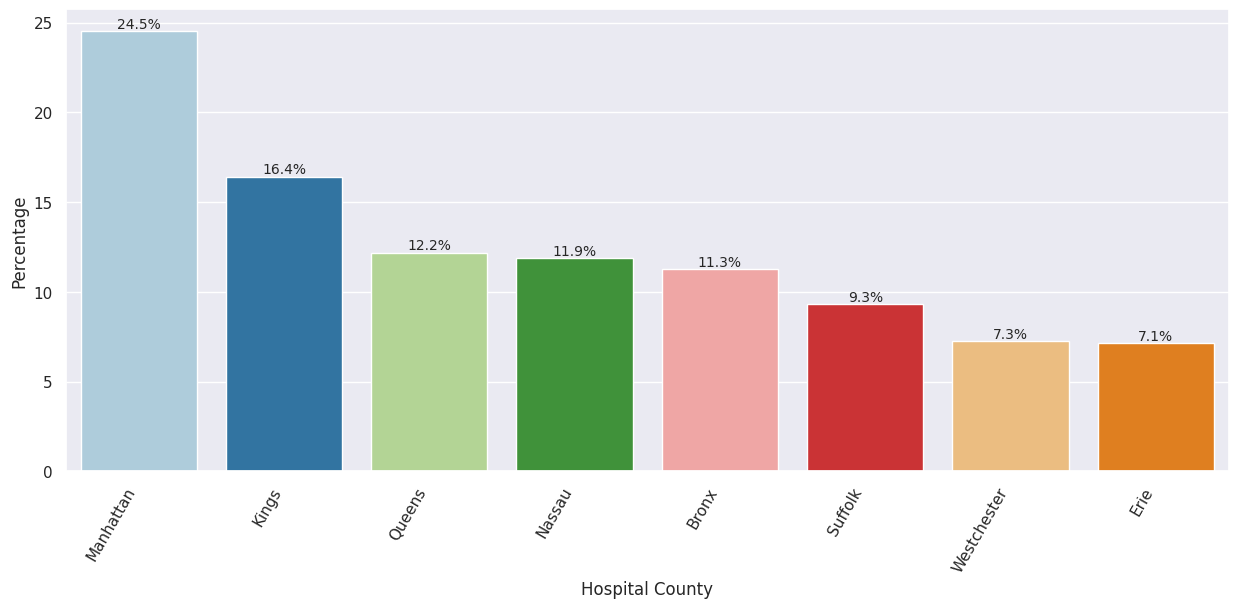

In [67]:
plot_categorical_with_percentage(data, 'Hospital County')

APR Medical Surgical Description        0       1      All
Hospital County                                           
All                               2000503  616502  2617005
Manhattan                          299173  146100   445273
Nassau                             157224   58606   215830
Kings                              247583   50530   298113
Queens                             179096   42221   221317
Erie                                90042   39574   129616
Suffolk                            130859   38566   169425
Monroe                              74137   35261   109398
Bronx                              172504   31806   204310
Westchester                        105677   26256   131933
Onondaga                            53510   22776    76286
Albany                              41884   20307    62191
Richmond                            53207   10722    63929
Oneida                              27741    8713    36454
Orange                              34767    8183    429

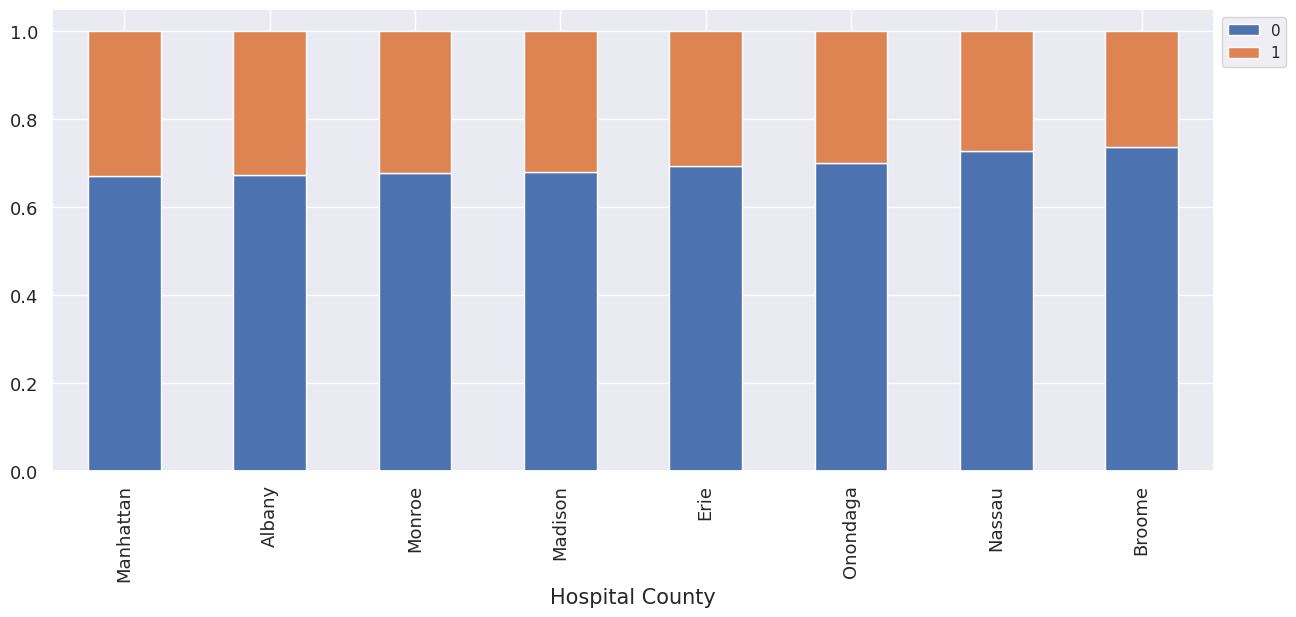

In [68]:
stacked_barplot(data['Hospital County'])

In [69]:
data['Hospital County'] = label_encoder.fit_transform(data['Hospital County'])

data['Hospital County'] = data['Hospital County'].apply(pd.to_numeric)

### **3. Observation on Facility Name**

In [70]:
# Check unique values and their counts
counts = data['Facility Name'].value_counts()
print(counts)

Mount Sinai Hospital                                              58696
North Shore University Hospital                                   54232
New York Presbyterian Hospital - Columbia Presbyterian Center     51021
New York Presbyterian Hospital - New York Weill Cornell Center    46716
Montefiore Medical Center - Henry & Lucy Moses Div                45212
                                                                  ...  
Cuba Memorial Hospital Inc                                           48
Albany Medical Center - South Clinical Campus                        37
Ellenville Regional Hospital                                         34
Rockefeller University Hospital                                      22
Monroe Community Hospital                                             4
Name: Facility Name, Length: 224, dtype: int64


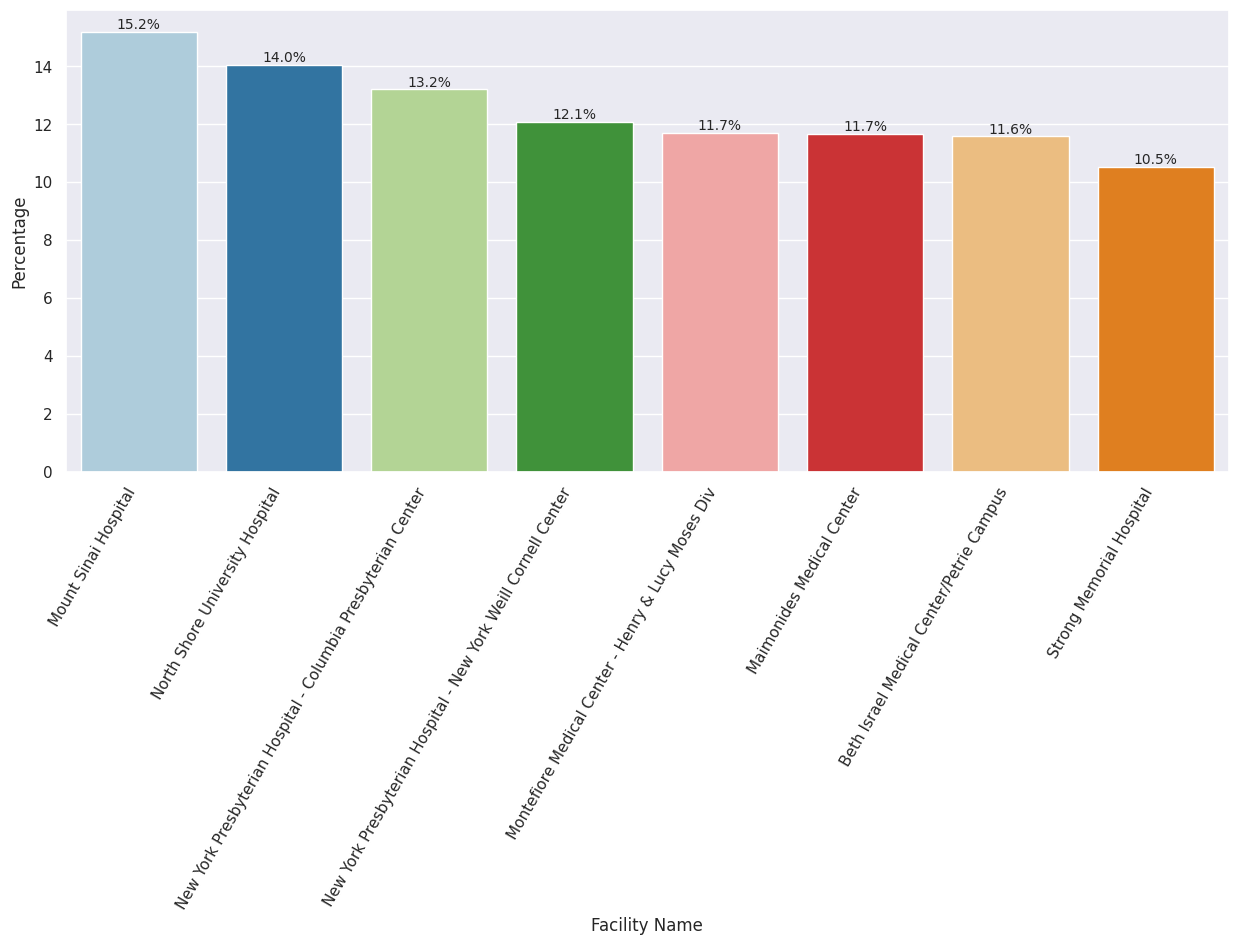

In [71]:
plot_categorical_with_percentage(data, 'Facility Name')

APR Medical Surgical Description                          0       1      All
Facility Name                                                               
All                                                 2000503  616502  2617005
Mount Sinai Hospital                                  35696   23000    58696
New York Presbyterian Hospital - Columbia Presb...    32623   18398    51021
North Shore University Hospital                       37033   17199    54232
New York Presbyterian Hospital - New York Weill...    30442   16274    46716
...                                                     ...     ...      ...
New York Presbyterian Hospital - Westchester Di...     4876       0     4876
St Joseph's MC-St Vincents Westchester Division        2852       0     2852
Coler-Goldwater Specialty Hospital & Nursing Fa...      484       0      484
Coler-Goldwater Spec Hosp&Nurs Fac - Goldwater ...      635       0      635
Delaware Valley Hospital Inc                            734       0      734

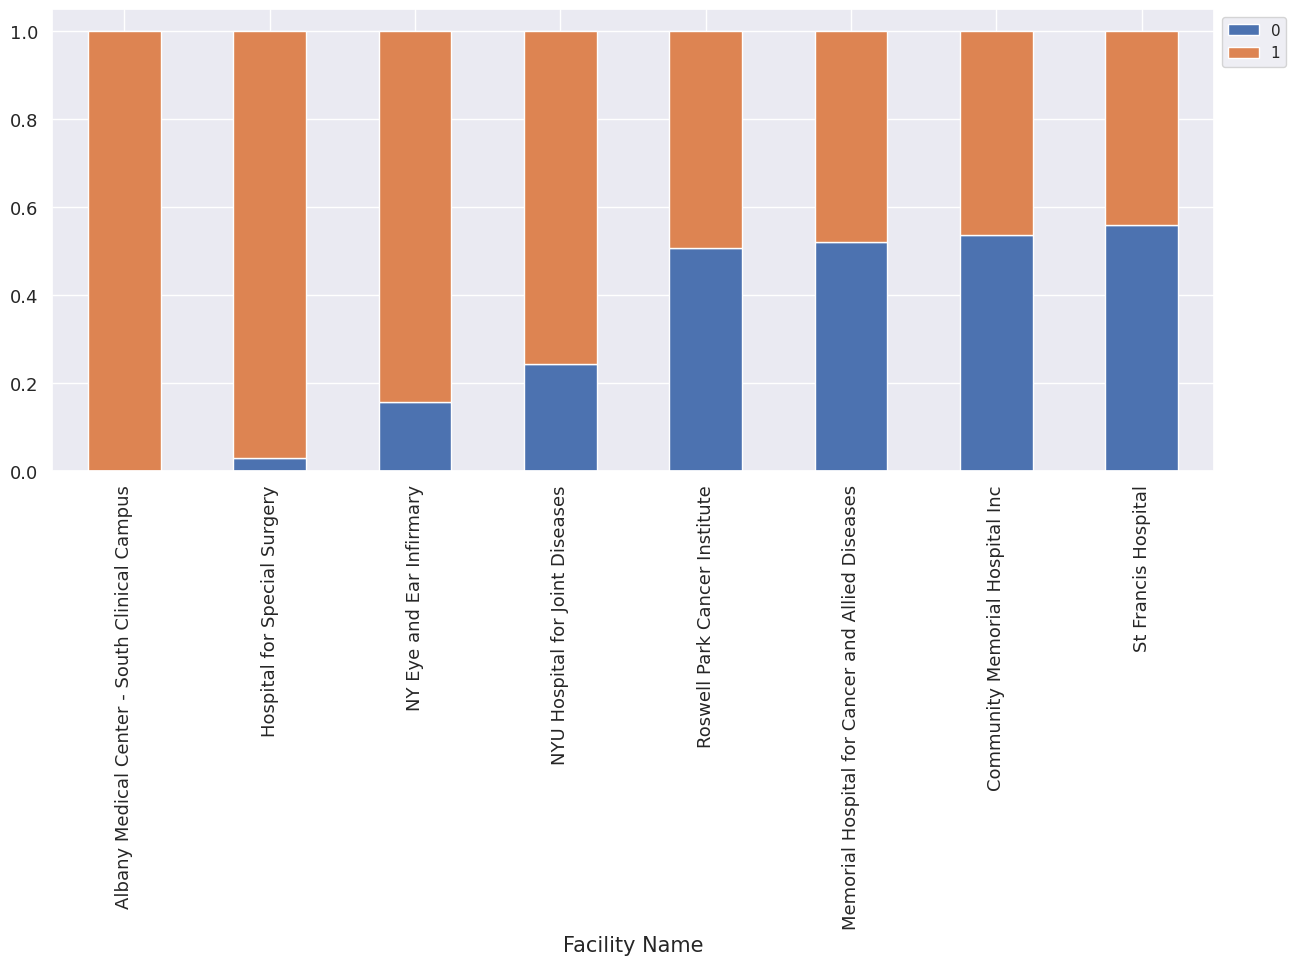

In [72]:
stacked_barplot(data['Facility Name'])

In [73]:
data['Facility Name'] = label_encoder.fit_transform(data['Facility Name'])

data['Facility Name'] = data['Facility Name'].apply(pd.to_numeric)

### **4. Observation on Age Group**

In [74]:
# Check unique values and their counts
counts = data['Age Group'].value_counts()
print(counts)

70 or Older    725205
50 to 69       680124
30 to 49       544937
0 to 17        387067
18 to 29       279672
Name: Age Group, dtype: int64


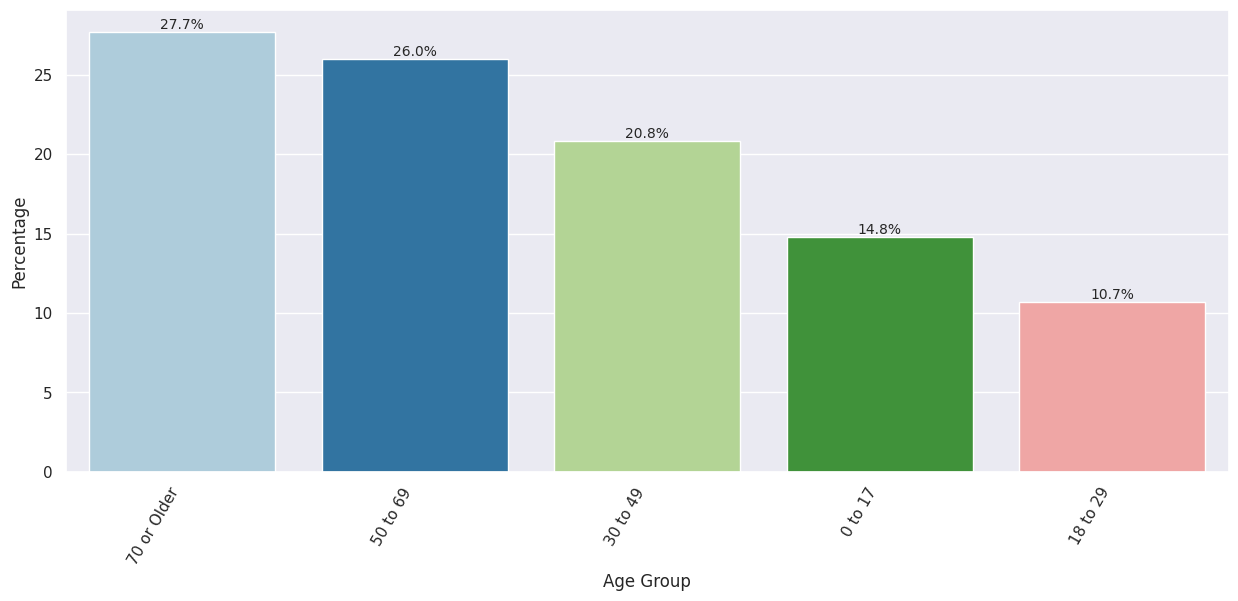

In [75]:
plot_categorical_with_percentage(data, 'Age Group')

APR Medical Surgical Description        0       1      All
Age Group                                                 
All                               2000503  616502  2617005
50 to 69                           474963  205161   680124
70 or Older                        564375  160830   725205
30 to 49                           387869  157068   544937
18 to 29                           212619   67053   279672
0 to 17                            360677   26390   387067
----------------------------------------------------------------------------------------------------


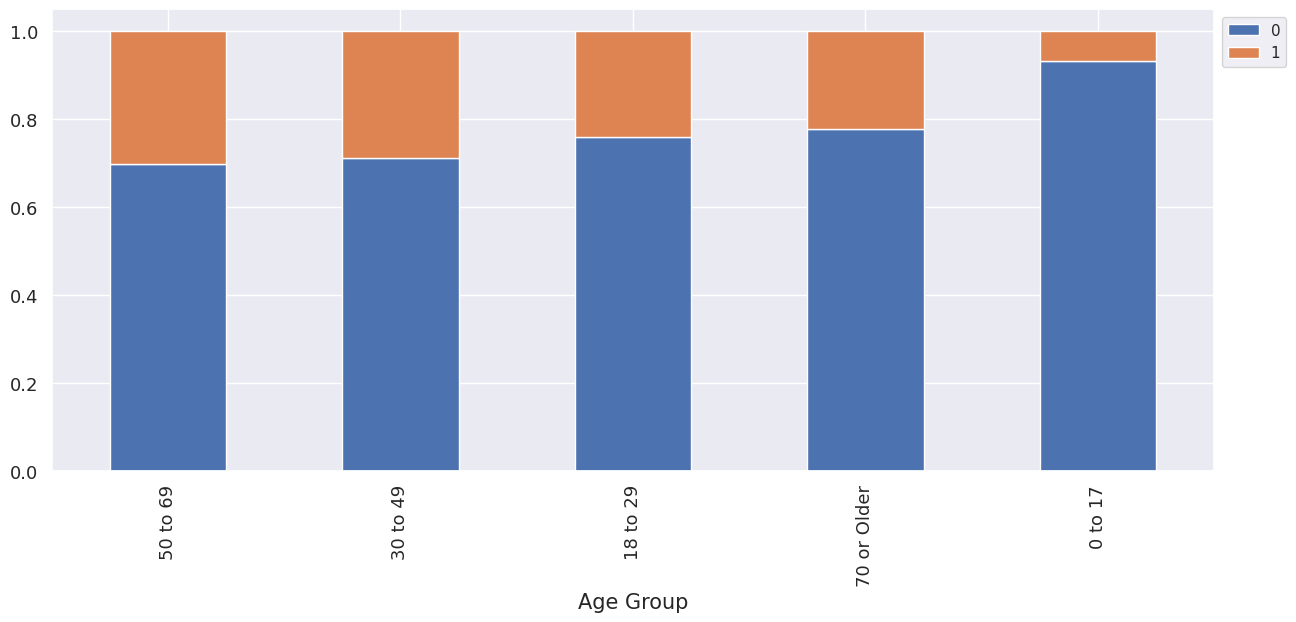

In [76]:
stacked_barplot(data['Age Group'])

In [77]:
data['Age Group'] = label_encoder.fit_transform(data['Age Group'])

data['Age Group'] = data['Age Group'].apply(pd.to_numeric)

### **5. Observation on Zip Code - 3 digits**

In [78]:
# Check unique values and their counts
counts = data['Zip Code - 3 digits'].unique().tolist()
counts = np.array(counts)
print(counts.T)

['nan' '100.0' '101.0' '103.0' '104.0' '105.0' '106.0' '107.0' '108.0'
 '109.0' '110.0' '111.0' '112.0' '113.0' '114.0' '115.0' '116.0' '117.0'
 '118.0' '119.0' '120.0' '121.0' '122.0' '122' '123' '124' '125' '126'
 '127' '128' '129' '130' '131' '132' '133' '134' '135' '136' '137' '138'
 '139' '140' '141' '142' '144' '145' '146' '147' '148' '149' 'OOS' '120'
 '121' '100' '101' '104' '105' '109' '112' '117' '103' '106' '107' '108'
 '110' '111' '113' '114' '115' '119' '143' '118' '116' '145' '146' '144'
 '130.0' '131.0' '132.0']


In [79]:
# Remove rows with 'OOS'
data = data[(data['Zip Code - 3 digits'] != 'OOS')]

In [80]:
# Remove nan values
data = data.dropna(subset=['Zip Code - 3 digits'])

In [81]:
# Step 1: Remove non-integer characters
data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].astype(str).str.replace(r'\.0$', '')

# Step 2: Convert to integer
data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].apply(pd.to_numeric)

<ipython-input-81-e053383f849d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Zip Code - 3 digits'] = data['Zip Code - 3 digits'].astype(str).str.replace(r'\.0$', '')


In [82]:
counts = data['Zip Code - 3 digits'].value_counts()
print(counts)

112    363159
104    243146
117    202461
100    201463
113    139545
115    102198
114     99962
142     72314
105     68475
103     67928
109     63423
146     58410
125     50513
140     49947
130     41113
120     36871
119     36682
107     35473
145     32439
121     32053
144     31449
110     30821
136     29879
132     29765
148     29206
128     27365
134     24760
141     24036
116     23471
111     22883
124     21012
147     20799
131     19484
122     19065
123     19025
133     17898
129     17298
138     15082
137     14884
127     13885
135     12158
126     12082
143     11327
108     10702
106     10169
139      9492
118      9269
149      8448
101      6348
Name: Zip Code - 3 digits, dtype: int64


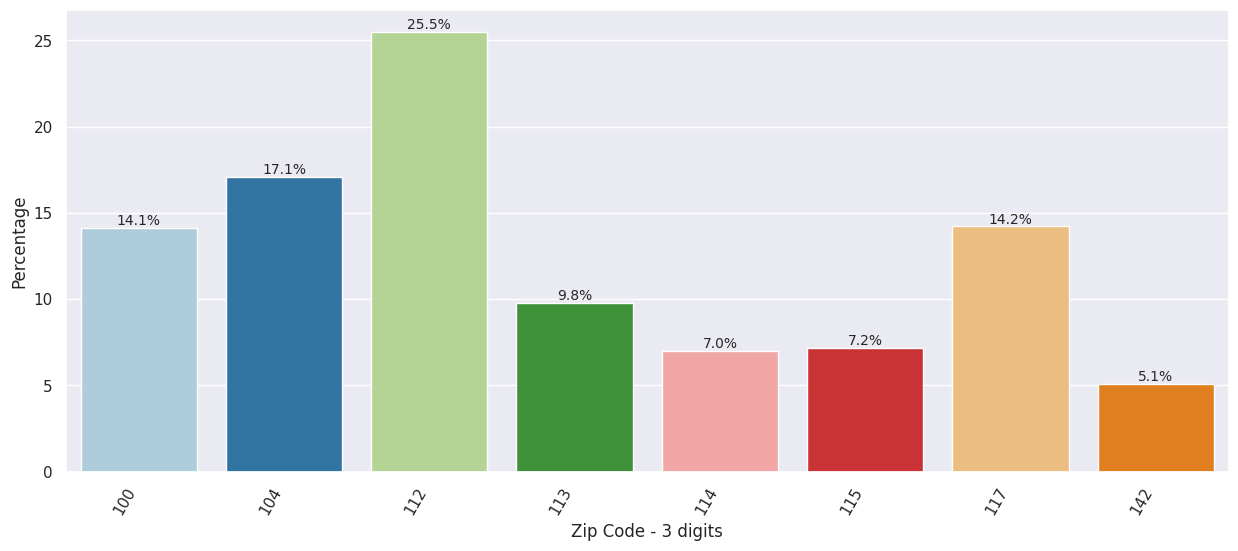

In [83]:
plot_categorical_with_percentage(data, 'Zip Code - 3 digits')

APR Medical Surgical Description        0       1      All
Zip Code - 3 digits                                       
All                               1956156  583481  2539637
112                                292032   71127   363159
117                                146418   56043   202461
100                                159773   41690   201463
104                                201915   41231   243146
113                                106782   32763   139545
115                                 76673   25525   102198
114                                 77991   21971    99962
142                                 54165   18149    72314
105                                 50920   17555    68475
146                                 43405   15005    58410
140                                 35413   14534    49947
103                                 53519   14409    67928
109                                 49301   14122    63423
125                                 38240   12273    505

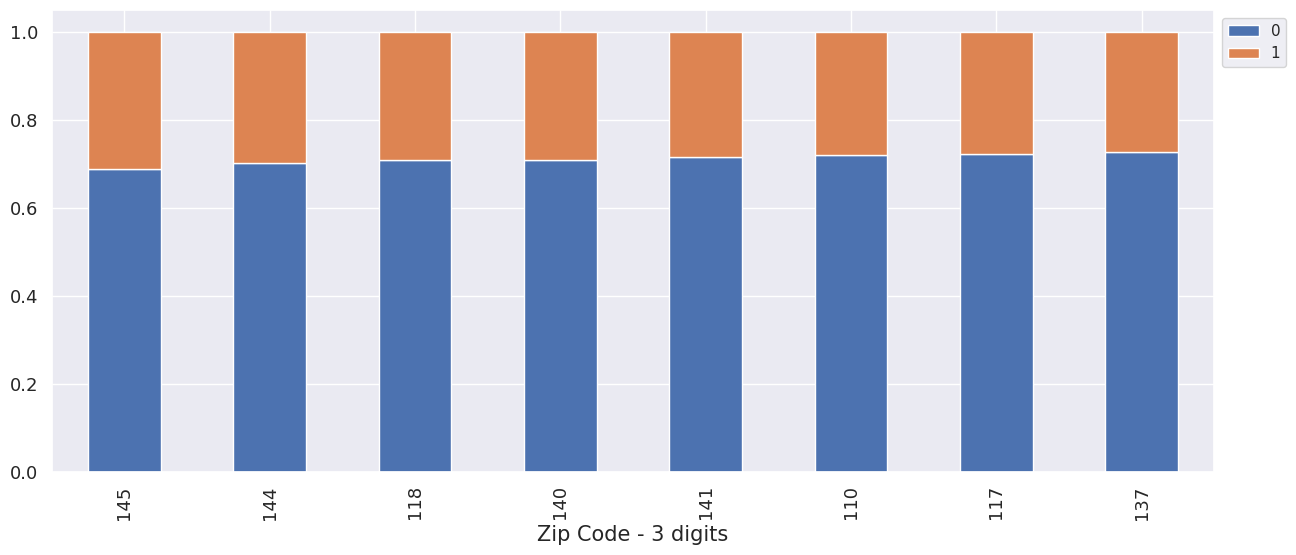

In [84]:
stacked_barplot(data['Zip Code - 3 digits'])

### **6. Observation on Gender**

In [85]:
# Check unique values and their counts
counts = data['Gender'].value_counts()
print(counts)

F    1433677
M    1105898
U         62
Name: Gender, dtype: int64


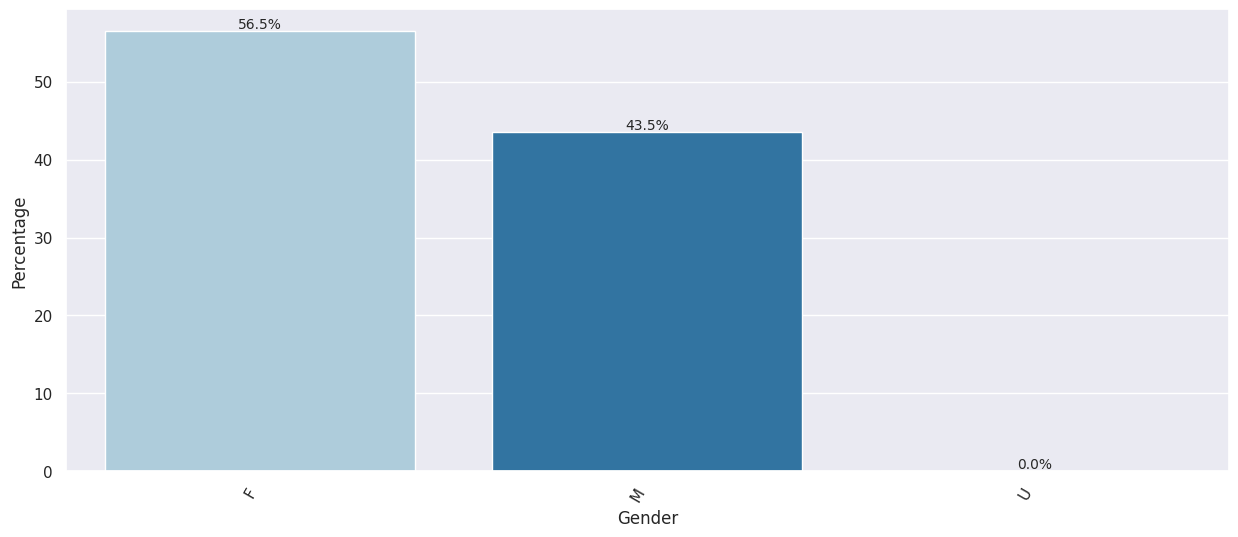

In [86]:
plot_categorical_with_percentage(data, 'Gender')

APR Medical Surgical Description        0       1      All
Gender                                                    
All                               1956156  583481  2539637
F                                 1084936  348741  1433677
M                                  871163  234735  1105898
U                                      57       5       62
----------------------------------------------------------------------------------------------------


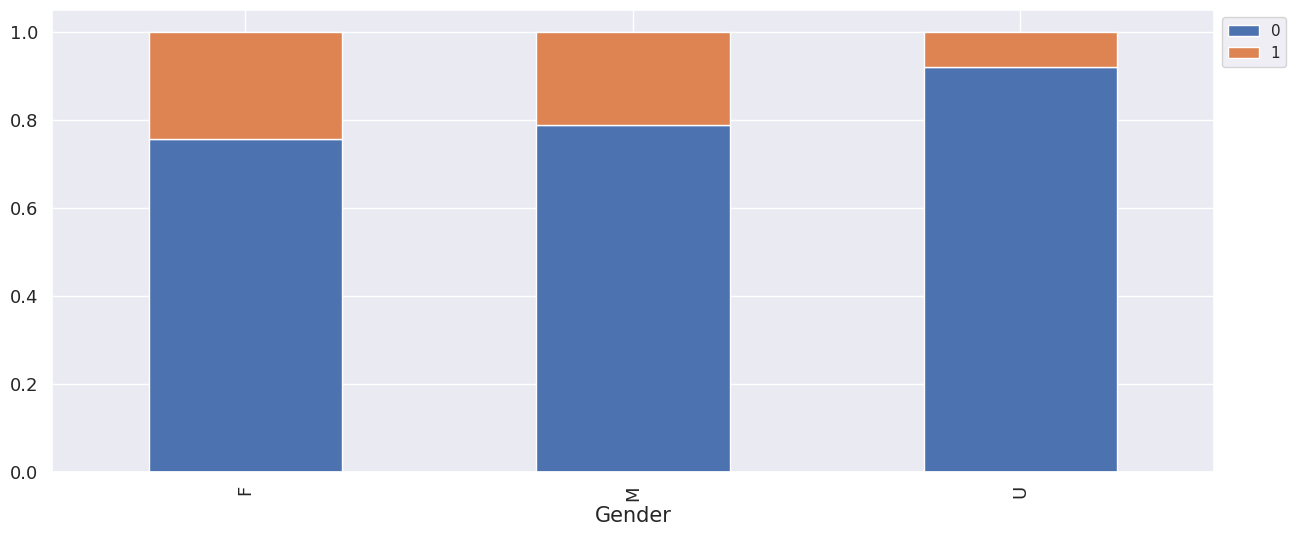

In [87]:
stacked_barplot(data['Gender'])

In [88]:
# Dropping rows with 'U' category
data = data[data['Gender'] != 'U']

data['Gender'] = label_encoder.fit_transform(data['Gender'])

data['Gender'].astype(int)

5          1
6          1
7          0
8          0
9          1
          ..
2617240    1
2617241    0
2617242    0
2617243    1
2617244    0
Name: Gender, Length: 2539575, dtype: int64

### **7. Observation on Race**

In [89]:
# Check unique values and their counts
counts = data['Race'].value_counts()
print(counts)

White                     1540035
Black/African American     490396
Other Race                 481510
Unknown                     27634
Name: Race, dtype: int64


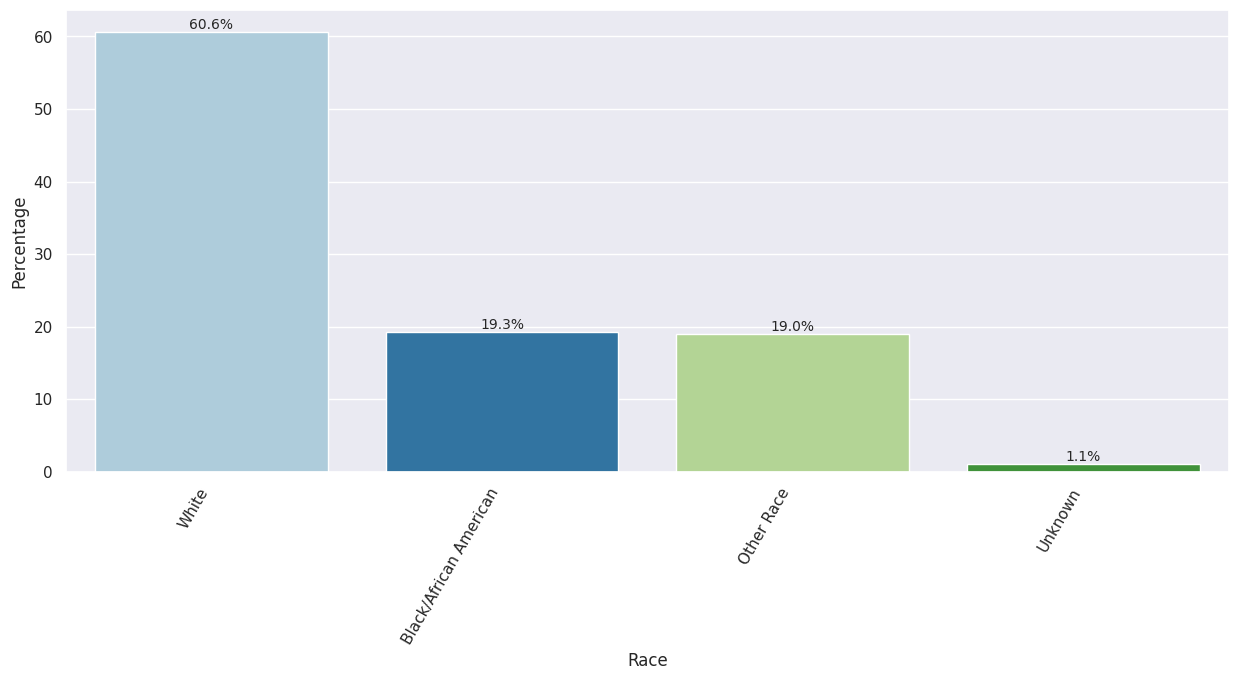

In [90]:
plot_categorical_with_percentage(data, 'Race')

APR Medical Surgical Description        0       1      All
Race                                                      
All                               1956099  583476  2539575
White                             1146089  393946  1540035
Other Race                         382956   98554   481510
Black/African American             405041   85355   490396
Unknown                             22013    5621    27634
----------------------------------------------------------------------------------------------------


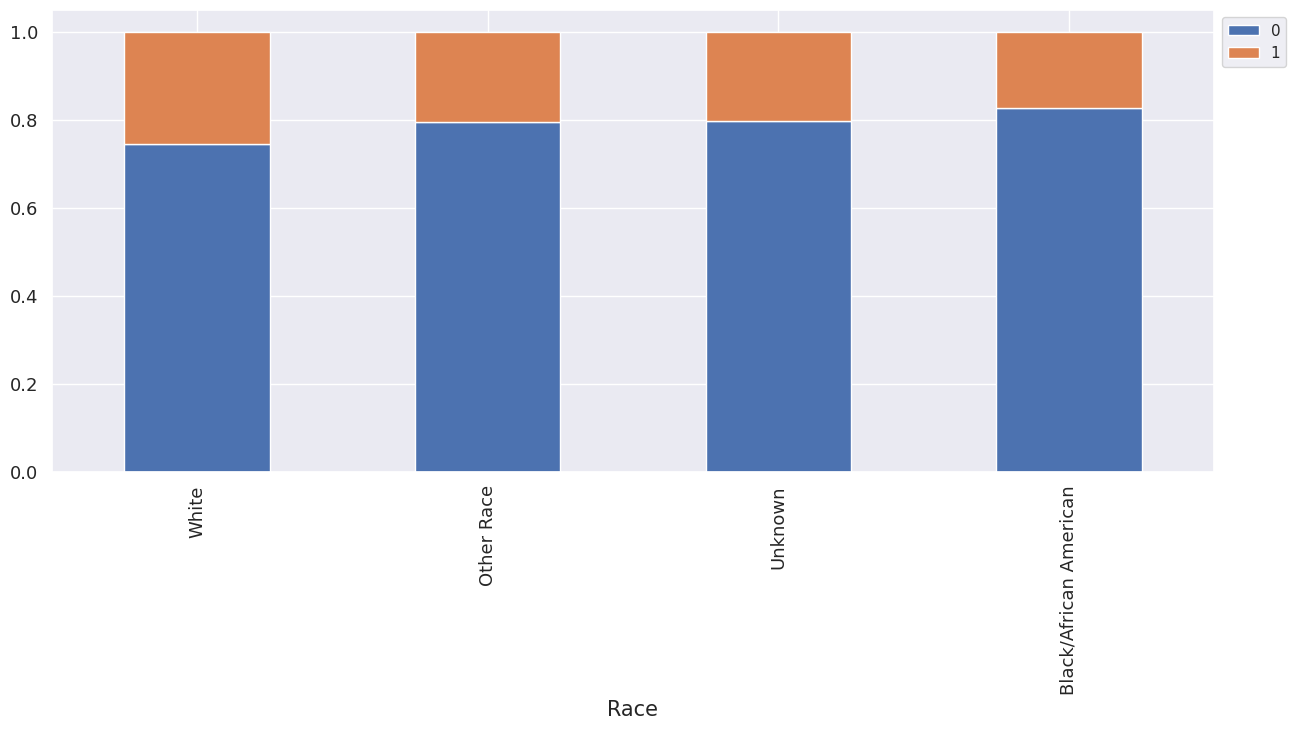

In [91]:
stacked_barplot(data['Race'])

In [93]:
data['Race'] = label_encoder.fit_transform(data['Race'])

data['Race'] = data['Race'].astype(int)

### **8. Observation on Ethnicity**

In [94]:
# Check unique values and their counts
counts = data['Ethnicity'].value_counts()
print(counts)

Not Span/Hispanic    2045763
Spanish/Hispanic      343582
Unknown               150230
Name: Ethnicity, dtype: int64


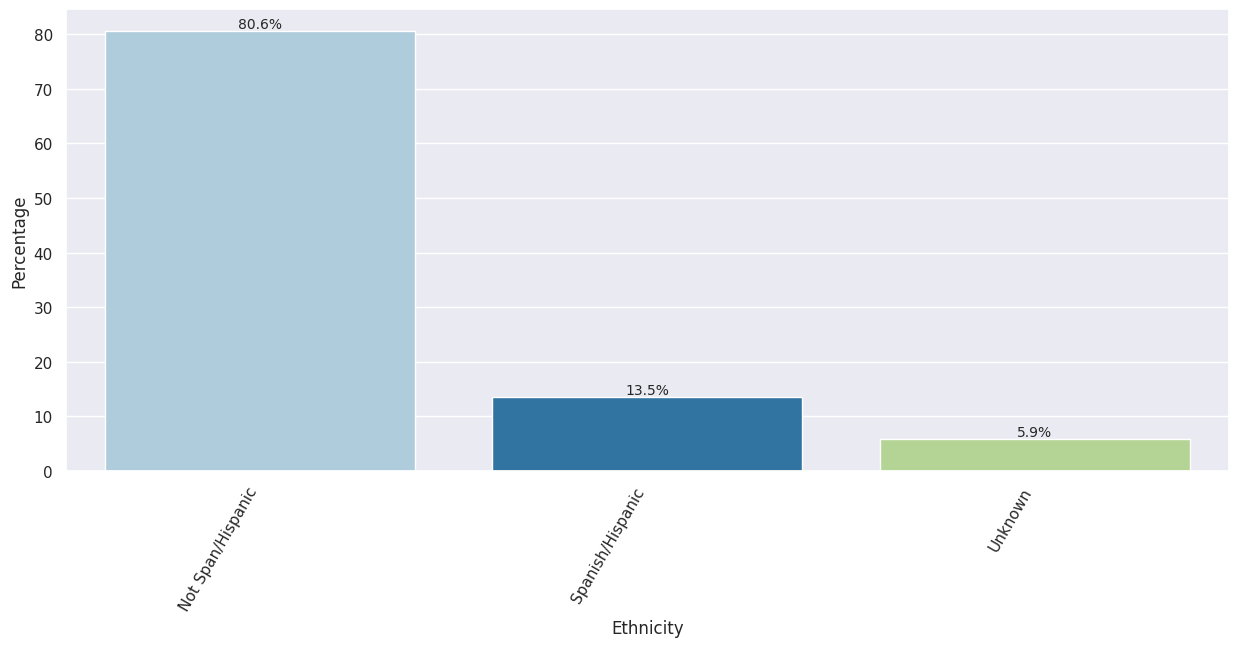

In [95]:
plot_categorical_with_percentage(data, 'Ethnicity')

APR Medical Surgical Description        0       1      All
Ethnicity                                                 
All                               1956099  583476  2539575
Not Span/Hispanic                 1560374  485389  2045763
Spanish/Hispanic                   274093   69489   343582
Unknown                            121632   28598   150230
----------------------------------------------------------------------------------------------------


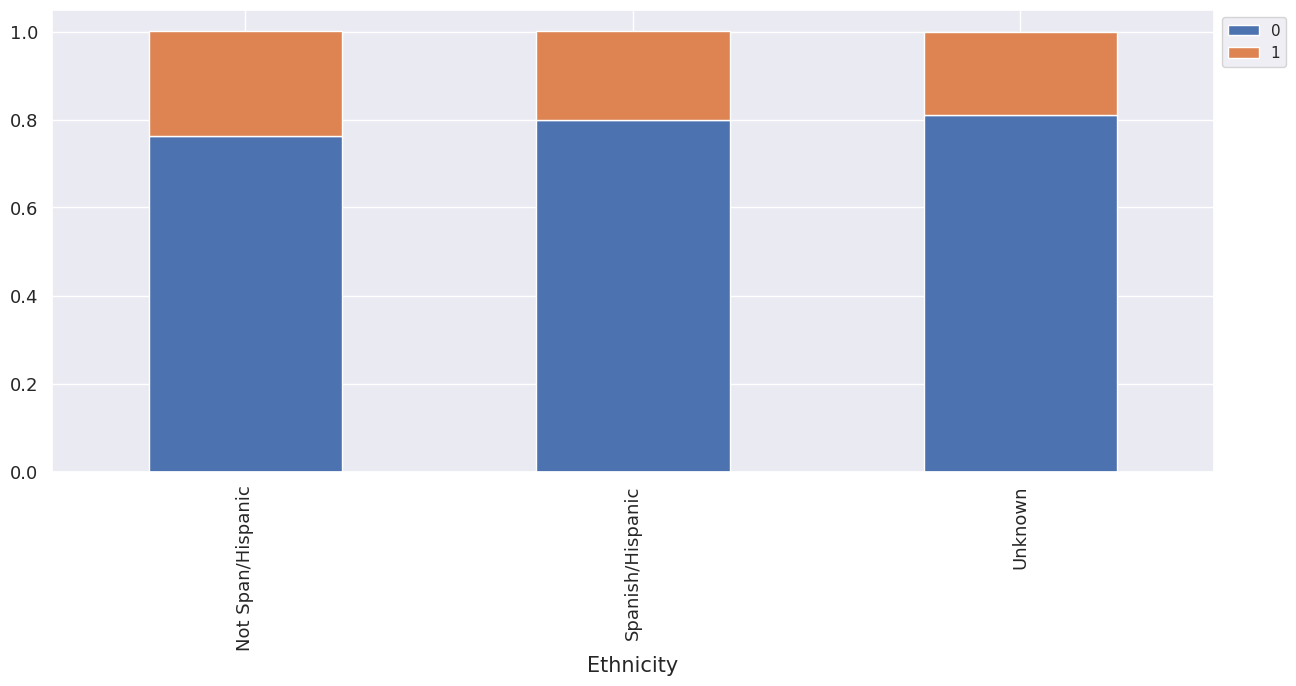

In [96]:
stacked_barplot(data['Ethnicity'])

In [98]:
data['Ethnicity'] = label_encoder.fit_transform(data['Ethnicity'])

data['Ethnicity'] = data['Ethnicity'].astype(int)

### **9. Observation on Length of Stay**

In [99]:
# Check unique values and their counts
counts = data['Length of Stay'].unique().tolist()
counts = np.array(counts)
print(counts.T)
print(counts.shape)

['3' '4' '1' '2' '9' '5' '120 +' '13' '18' '8' '7' '6' '11' '15' '17' '25'
 '16' '47' '20' '37' '12' '19' '27' '10' '31' '14' '22' '29' '87' '103'
 '109' '85' '30' '26' '44' '21' '36' '72' '89' '76' '49' '98' '105' '69'
 '45' '32' '57' '24' '39' '81' '33' '28' '23' '77' '88' '63' '55' '41'
 '61' '53' '38' '51' '40' '35' '59' '46' '50' '92' '64' '34' '73' '60'
 '67' '68' '97' '80' '82' '71' '95' '113' '118' '54' '91' '100' '115' '90'
 '42' '108' '58' '70' '65' '43' '66' '94' '48' '75' '112' '52' '78' '62'
 '106' '84' '107' '93' '104' '56' '117' '79' '116' '83' '74' '96' '86'
 '114' '110' '99' '102' '101' '27' '4' '2' '3' '25' '12' '15' '16' '31'
 '23' '22' '1' '28' '29' '26' '7' '11' '5' '20' '13' '14' '6' '30' '21'
 '18' '17' '10' '24' '9' '34' '8' '32' '19' '38' '33' '36' '35' '98' '50'
 '51' '55' '66' '43' '77' '84' '41' '40' '91' '42' '60' '58' '45' '47'
 '70' '63' '44' '48' '59' '46' '39' '56' '90' '49' '109' '37' '53' '67'
 '76' '57' '61' '69' '52' '114' '75' '85' '72' '81' '119' 

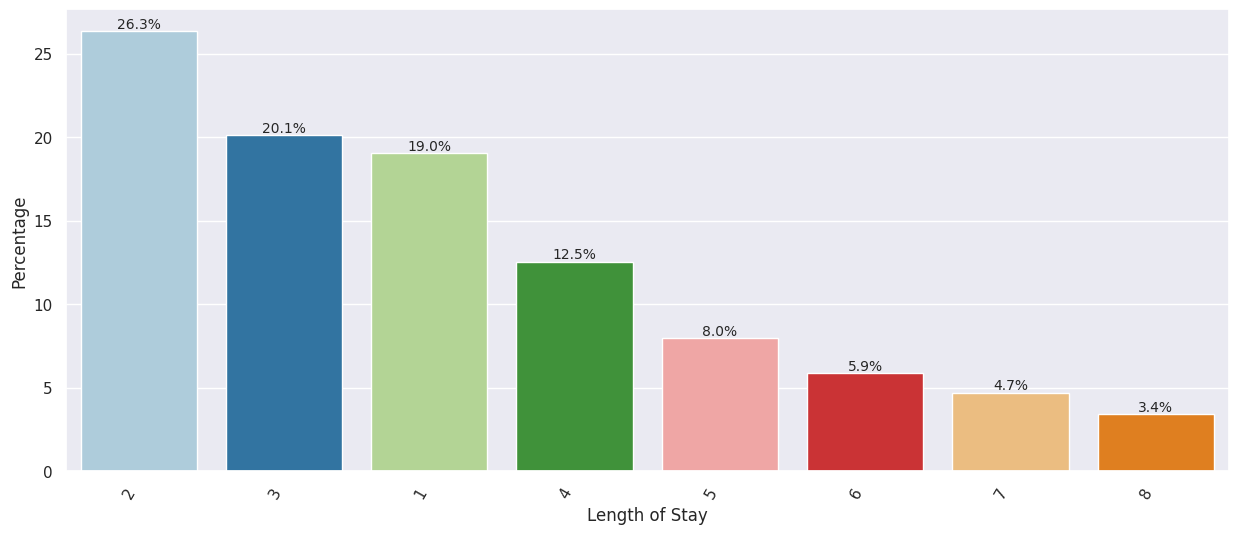

In [100]:
plot_categorical_with_percentage(data, 'Length of Stay')

APR Medical Surgical Description        0       1      All
Length of Stay                                            
All                               1956099  583476  2539575
1                                  287649  108728   396377
3                                  311584  107334   418918
2                                  468566   79577   548143
4                                  192351   68655   261006
...                                   ...     ...      ...
73                                      2       0        2
70                                      1       0        1
59                                      3       0        3
118                                     1       0        1
81                                      2       0        2

[220 rows x 3 columns]
----------------------------------------------------------------------------------------------------


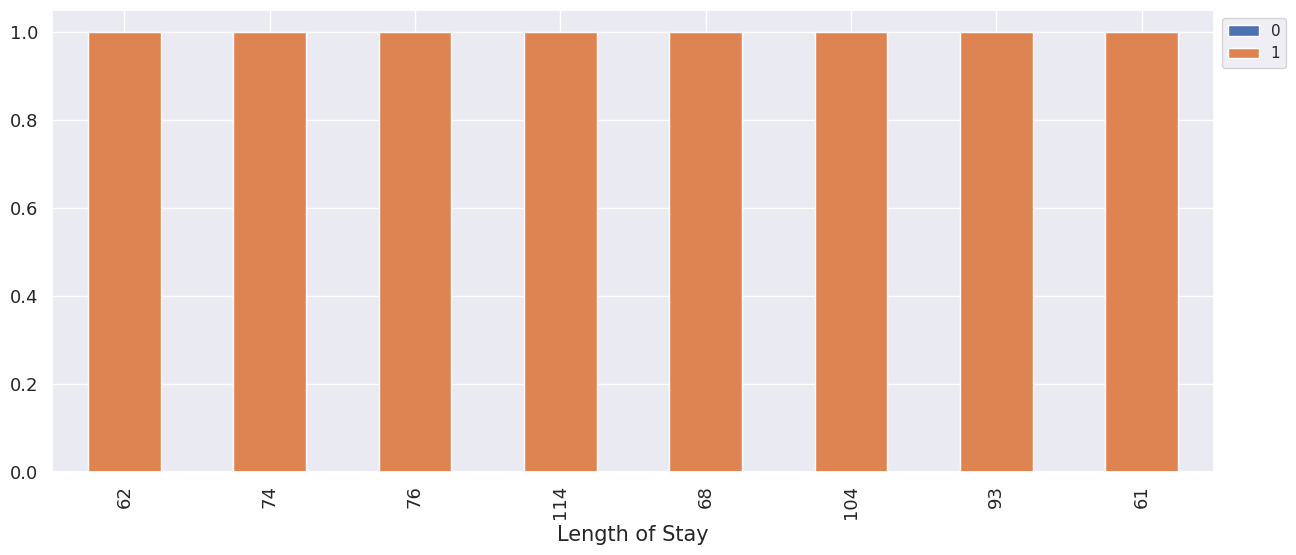

In [101]:
stacked_barplot(data['Length of Stay'])

In [102]:
# Step 1: Remove non-numeric characters
data[data['Length of Stay'] == '120 +'] = '120'

In [103]:
data['Length of Stay'] = data['Length of Stay'].apply(pd.to_numeric)

In [104]:
counts = data['Length of Stay'].unique().tolist()
counts = np.array(counts)
print(counts.T)
print(counts.shape)

[  3   4   1   2   9   5 120  13  18   8   7   6  11  15  17  25  16  47
  20  37  12  19  27  10  31  14  22  29  87 103 109  85  30  26  44  21
  36  72  89  76  49  98 105  69  45  32  57  24  39  81  33  28  23  77
  88  63  55  41  61  53  38  51  40  35  59  46  50  92  64  34  73  60
  67  68  97  80  82  71  95 113 118  54  91 100 115  90  42 108  58  70
  65  43  66  94  48  75 112  52  78  62 106  84 107  93 104  56 117  79
 116  83  74  96  86 114 110  99 102 101 119 111]
(120,)


### **10. Observation on Type of Admission**

In [105]:
# Check unique values and their counts
counts = data['Type of Admission'].value_counts()
print(counts)

Emergency        1589923
Elective          483897
Newborn           235740
Urgent            223067
Not Available       3933
120                 2154
Trauma               861
Name: Type of Admission, dtype: int64


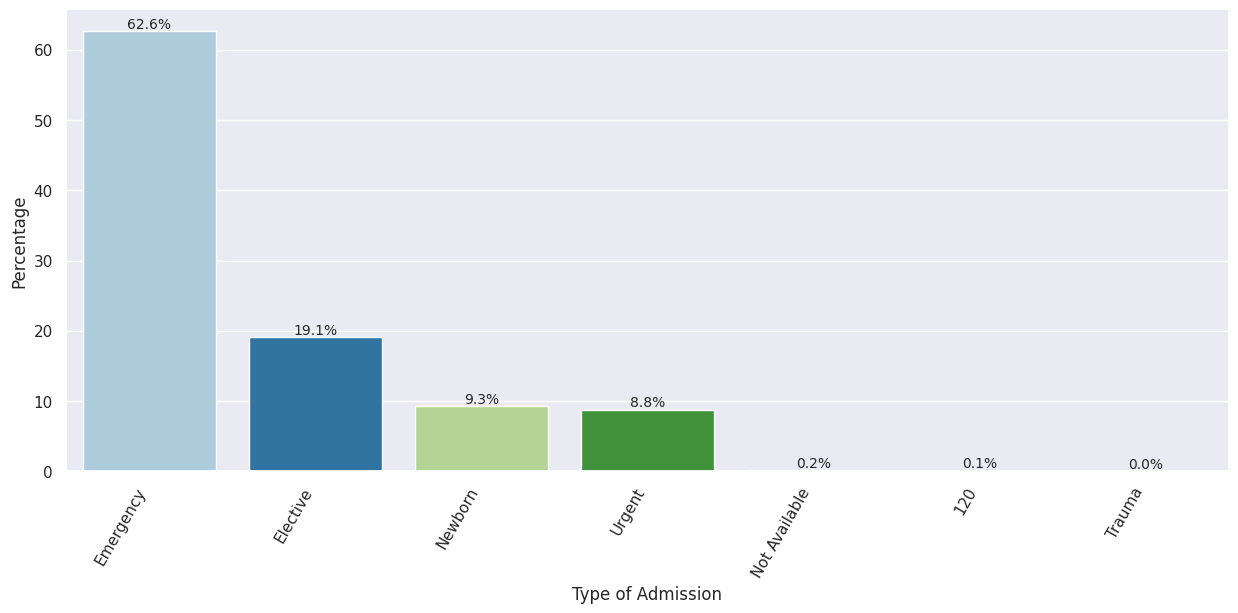

In [106]:
plot_categorical_with_percentage(data, 'Type of Admission')

APR Medical Surgical Description        0       1   120      All
Type of Admission                                               
All                               1954602  582819  2154  2539575
Elective                           193932  289965     0   483897
Emergency                         1363517  226406     0  1589923
Urgent                             159304   63763     0   223067
Not Available                        2292    1641     0     3933
Newborn                            235075     665     0   235740
Trauma                                482     379     0      861
120                                     0       0  2154     2154
----------------------------------------------------------------------------------------------------


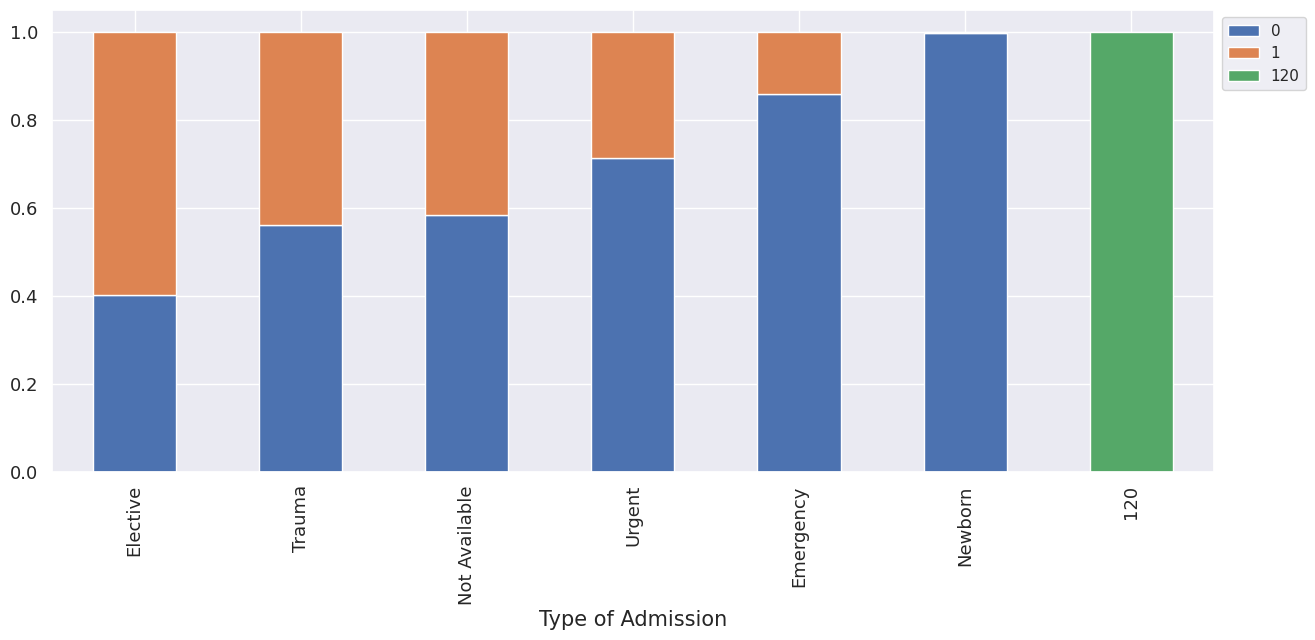

In [107]:
stacked_barplot(data['Type of Admission'])

In [108]:
# Remove the rows with value '120'
data = data[data['Type of Admission'] != '120']

In [109]:
data['Type of Admission'] = label_encoder.fit_transform(data['Type of Admission'])

data['Type of Admission'].astype('int8')

5          1
6          1
7          1
8          1
9          0
          ..
2617240    0
2617241    0
2617242    0
2617243    0
2617244    0
Name: Type of Admission, Length: 2537421, dtype: int8

### **11. Observation on Patient Disposition**

In [110]:
# Check unique values and their counts
counts = data['Patient Disposition'].value_counts()
print(counts)

Home or Self Care                        1724160
Home w/ Home Health Services              312034
Skilled Nursing Home                      242207
Left Against Medical Advice                55452
Expired                                    54588
Short-term Hospital                        45571
Inpatient Rehabilitation Facility          41922
Psychiatric Hospital or Unit of Hosp       14867
Hospice - Medical Facility                  8496
Another Type Not Listed                     8304
Hospice - Home                              8294
Facility w/ Custodial/Supportive Care       7183
Cancer Center or Children's Hospital        4813
Medicare Cert Long Term Care Hospital       3349
Court/Law Enforcement                       3302
Hosp Basd Medicare Approved Swing Bed       2008
Federal Health Care Facility                 687
Medicaid Cert Nursing Facility                44
Critical Access Hospital                      41
Name: Patient Disposition, dtype: int64


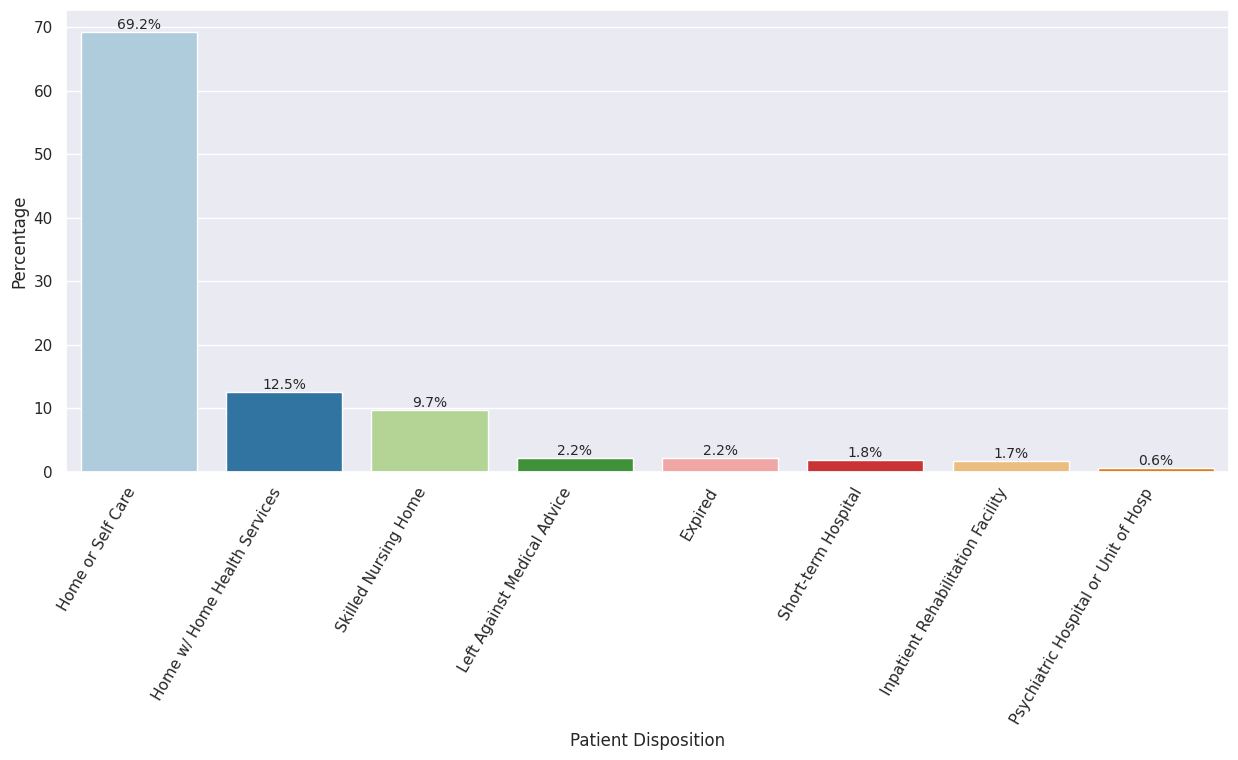

In [111]:
plot_categorical_with_percentage(data, 'Patient Disposition')

APR Medical Surgical Description             0       1      All
Patient Disposition                                            
All                                    1954519  582803  2537322
Home or Self Care                      1335771  388389  1724160
Home w/ Home Health Services            222928   89106   312034
Skilled Nursing Home                    177811   64396   242207
Inpatient Rehabilitation Facility        19299   22623    41922
Expired                                  46129    8459    54588
Short-term Hospital                      42689    2882    45571
Left Against Medical Advice              53943    1509    55452
Cancer Center or Children's Hospital      3918     895     4813
Court/Law Enforcement                     2499     803     3302
Hospice - Medical Facility                7715     781     8496
Facility w/ Custodial/Supportive Care     6546     637     7183
Hospice - Home                            7763     531     8294
Hosp Basd Medicare Approved Swing Bed   

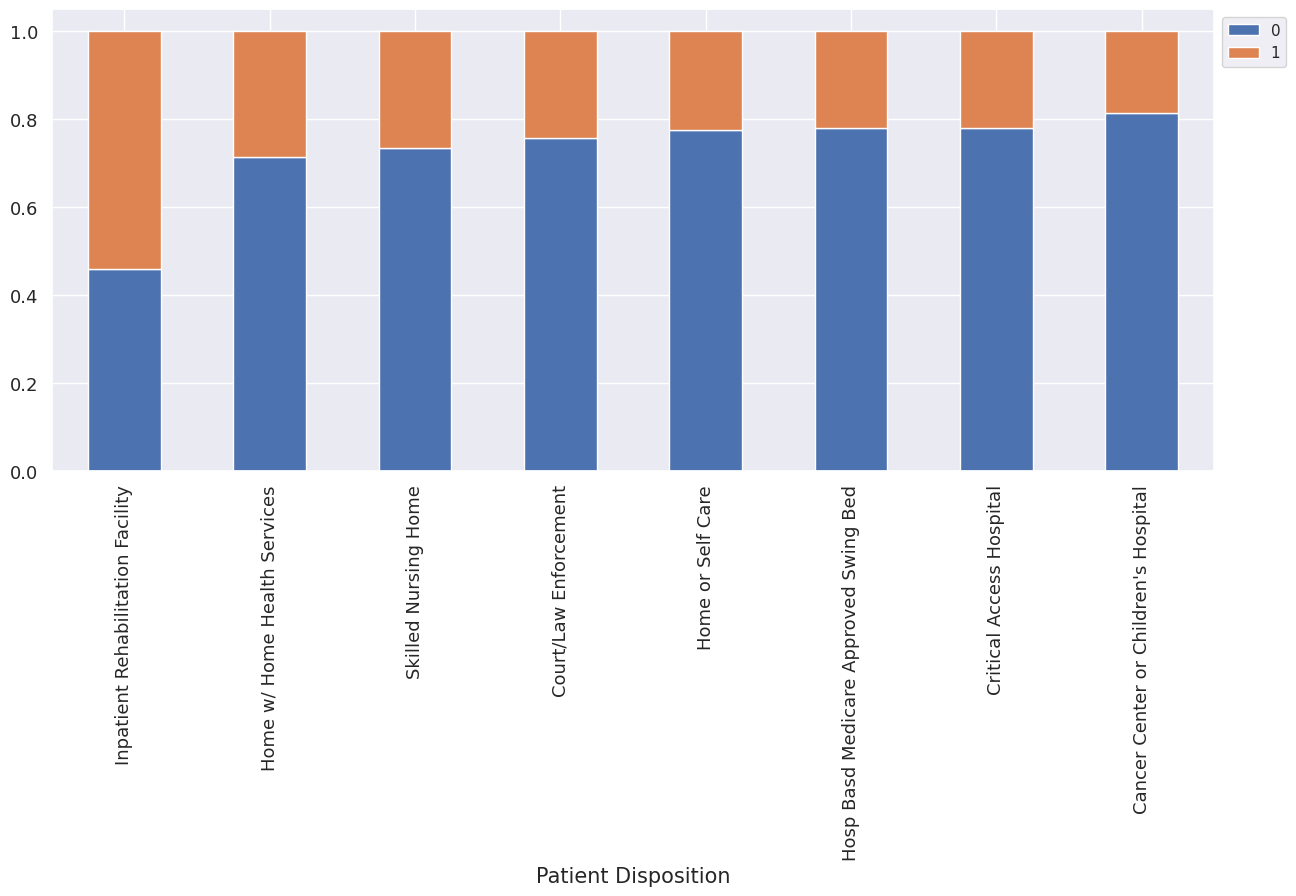

In [112]:
stacked_barplot(data['Patient Disposition'])

In [113]:
data['Patient Disposition'] = label_encoder.fit_transform(data['Patient Disposition'])

data['Patient Disposition'] = data['Patient Disposition'].astype('int8')

### **12. Observation on Discharge Year**

In [114]:
# Check unique values and their counts
counts = data['Discharge Year'].value_counts()
print(counts)

2010    2537421
Name: Discharge Year, dtype: int64


In [115]:
data = data.drop(columns=['Discharge Year'])

### **13. Observation on APR Risk of Mortality**

In [116]:
# Check unique values and their counts
counts = data['APR Risk of Mortality'].value_counts()
print(counts)

Minor       1588710
Moderate     537558
Major        292559
Extreme      118594
Name: APR Risk of Mortality, dtype: int64


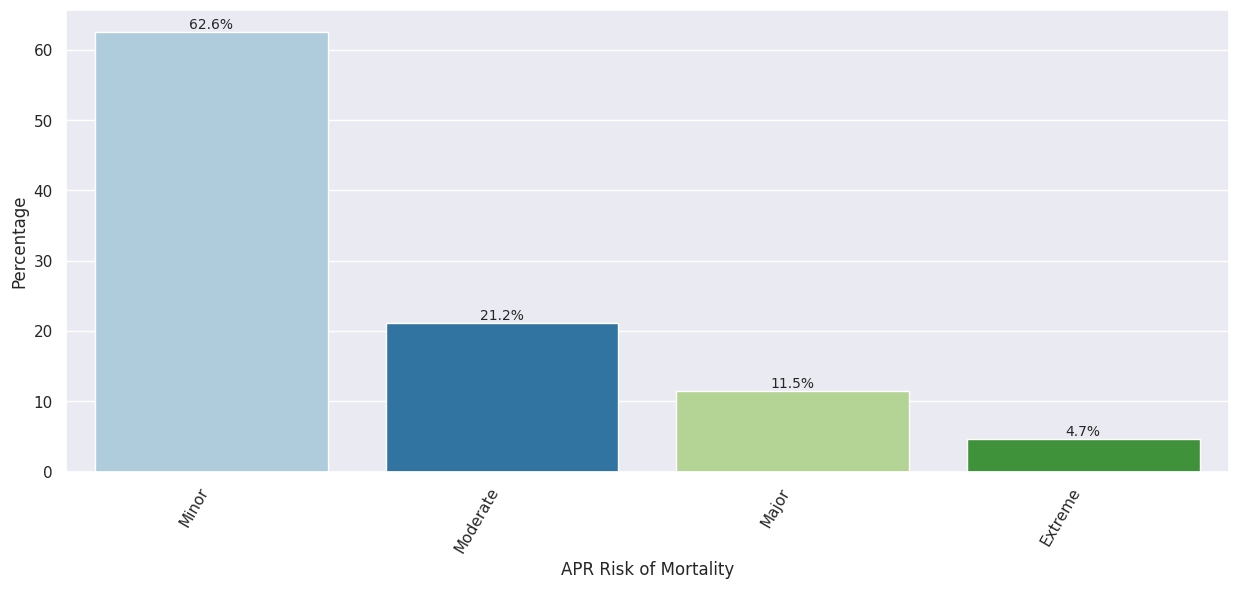

In [117]:
plot_categorical_with_percentage(data, 'APR Risk of Mortality')

APR Medical Surgical Description        0       1      All
APR Risk of Mortality                                     
All                               1954602  582819  2537421
Minor                             1192183  396527  1588710
Moderate                           430604  106954   537558
Major                              240999   51560   292559
Extreme                             90816   27778   118594
----------------------------------------------------------------------------------------------------


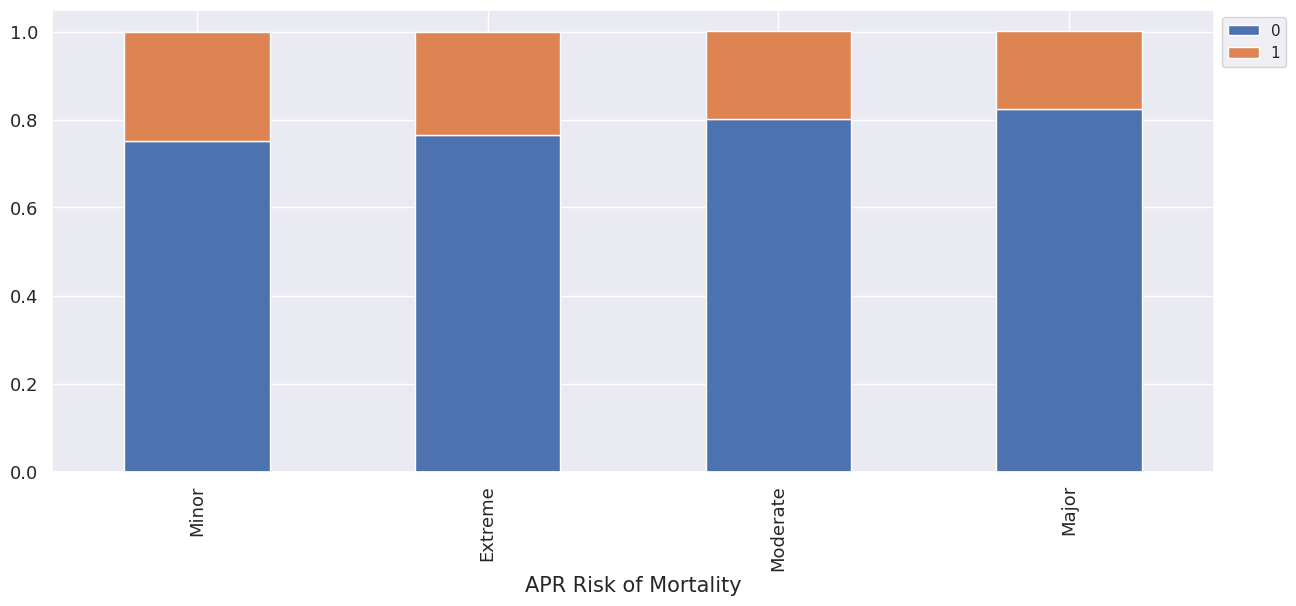

In [118]:
stacked_barplot(data['APR Risk of Mortality'])

In [119]:
data = data.dropna(subset=['APR Risk of Mortality'])

In [120]:
data['APR Risk of Mortality'] = label_encoder.fit_transform(data['APR Risk of Mortality'])

data['APR Risk of Mortality'] = data['APR Risk of Mortality'].astype('int8')

### **14. Observation on APR Medical Surgical Description**

In [121]:
# Check unique values and their counts
counts = data['APR Medical Surgical Description'].value_counts()
print(counts)

0    1954602
1     582819
Name: APR Medical Surgical Description, dtype: int64


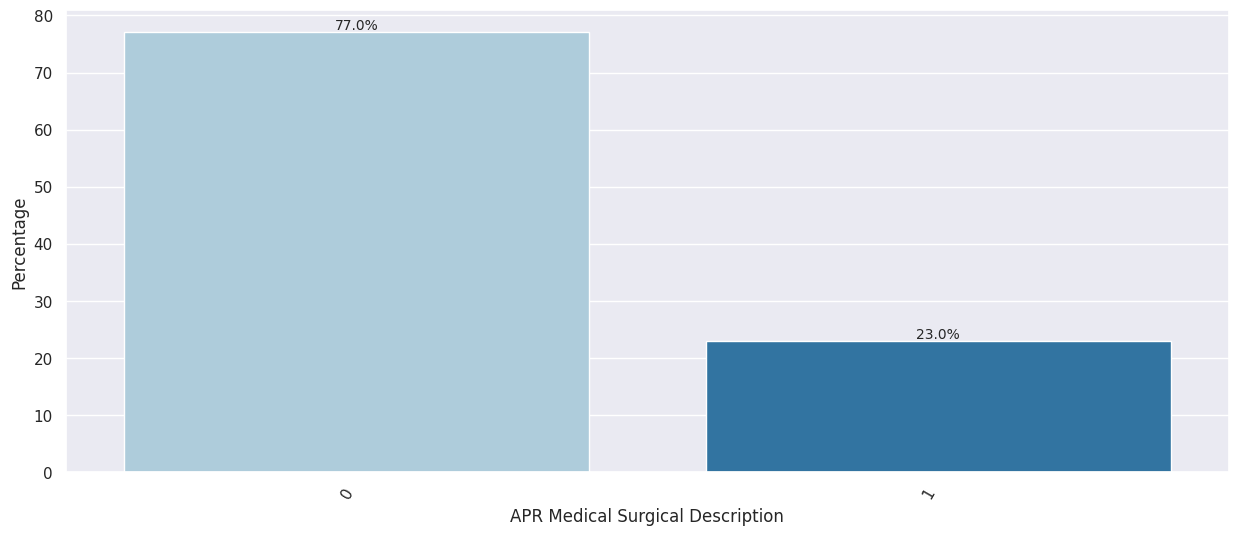

In [122]:
plot_categorical_with_percentage(data, 'APR Medical Surgical Description')

APR Medical Surgical Description        0       1      All
APR Medical Surgical Description                          
1                                       0  582819   582819
All                               1954602  582819  2537421
0                                 1954602       0  1954602
----------------------------------------------------------------------------------------------------


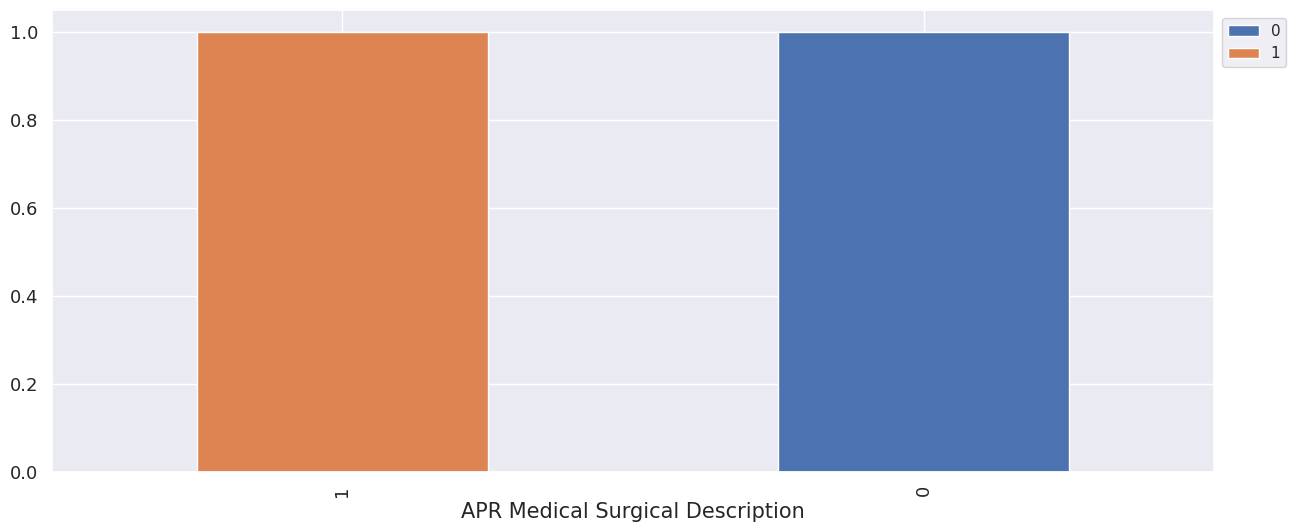

In [123]:
stacked_barplot(data['APR Medical Surgical Description'])

In [124]:
# Mapping of categories to numerical values
apr_medical_surgical_mapping = {
    'Medical': 1,
    'Surgical': 0
}

In [125]:
data['APR Medical Surgical Description_encoded'] = data['APR Medical Surgical Description'].map(apr_medical_surgical_mapping)

In [126]:
data['APR Medical Surgical Description'] = data['APR Medical Surgical Description'].astype('int8')

### **15. Observation on Source of Payment 1**

In [127]:
# Check unique values and their counts
counts = data['Source of Payment 1'].value_counts()
print(counts)

Medicare                     842885
Insurance Company            828879
Medicaid                     384123
Blue Cross                   320454
Self-Pay                     120250
Workers Compensation          14879
Other Non-Federal Program     10528
CHAMPUS                        9089
Other Federal Program          6289
Unknown                          45
Name: Source of Payment 1, dtype: int64


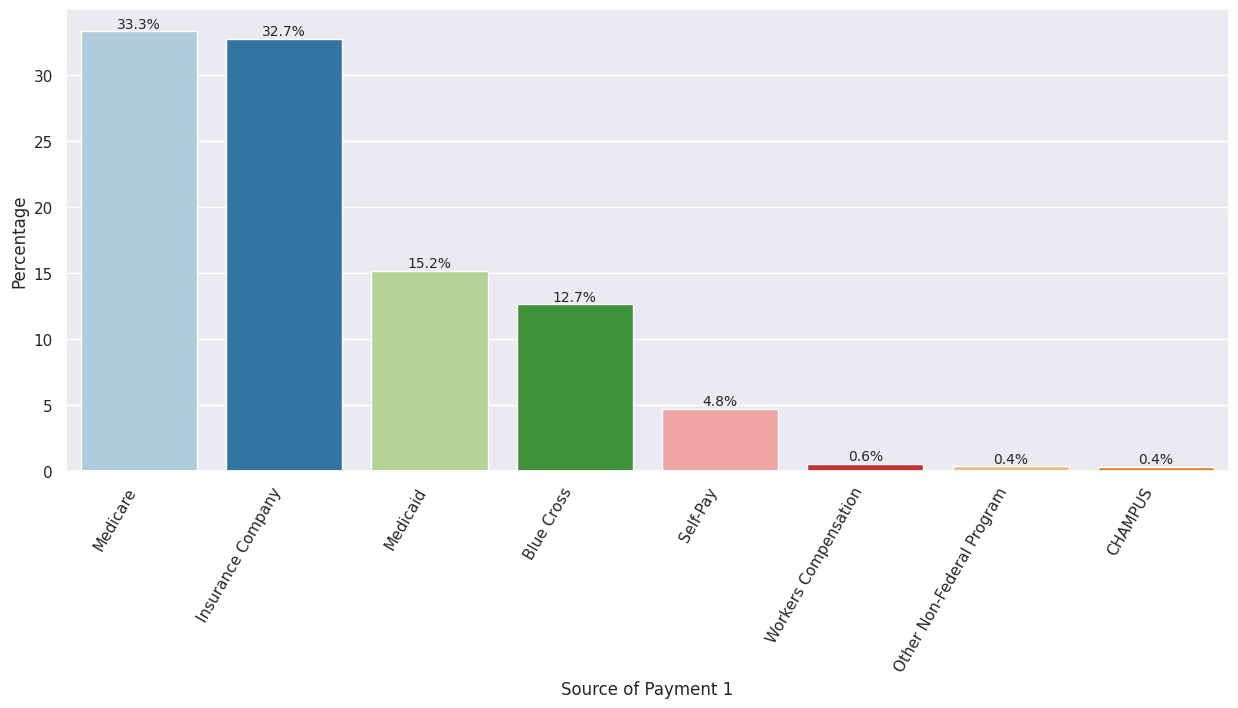

In [128]:
plot_categorical_with_percentage(data, 'Source of Payment 1')

APR Medical Surgical Description        0       1      All
Source of Payment 1                                       
All                               1954602  582819  2537421
Insurance Company                  621121  207758   828879
Medicare                           657786  185099   842885
Blue Cross                         220061  100393   320454
Medicaid                           331525   52598   384123
Self-Pay                            98644   21606   120250
Workers Compensation                 5287    9592    14879
Other Non-Federal Program            7922    2606    10528
CHAMPUS                              7260    1829     9089
Other Federal Program                4958    1331     6289
Unknown                                38       7       45
----------------------------------------------------------------------------------------------------


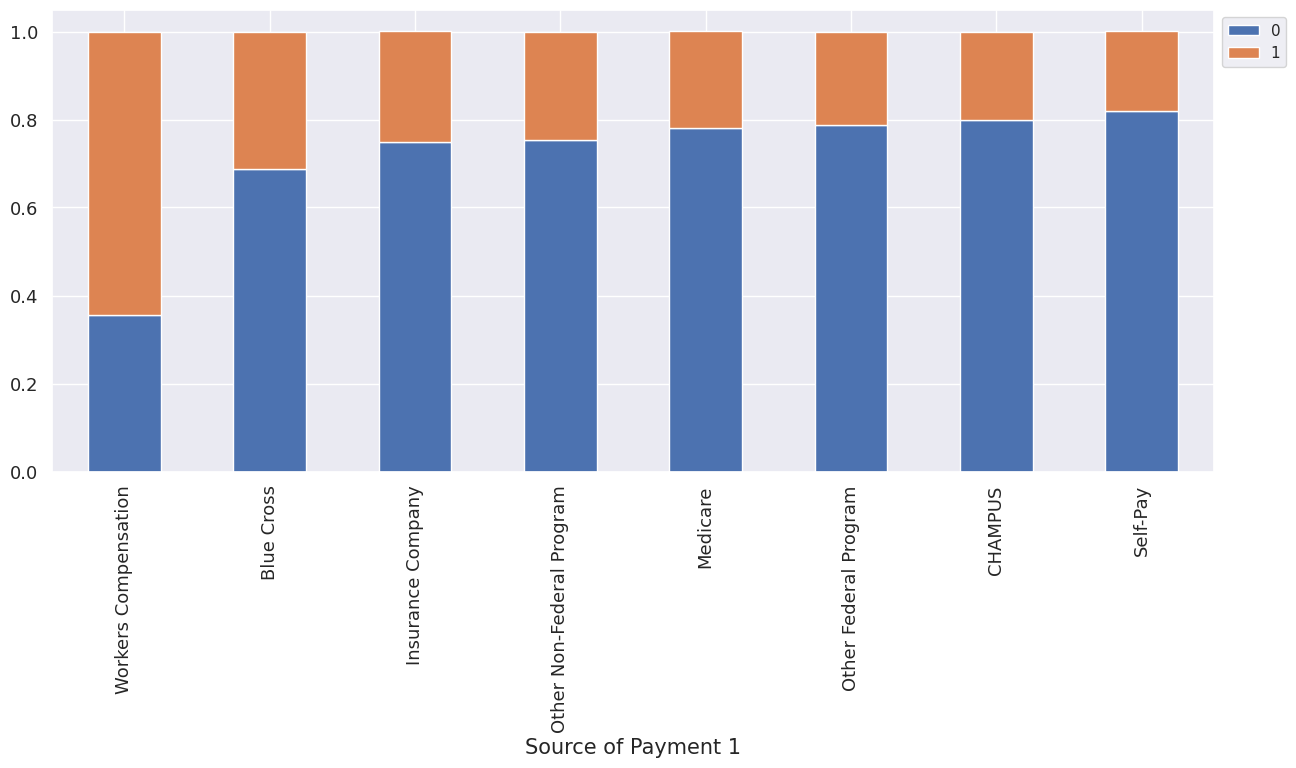

In [129]:
stacked_barplot(data['Source of Payment 1'])

In [130]:
# Mapping of categories to numerical values
payment_mapping = {
    'Medicare': 1,
    'Insurance Company': 2,
    'Medicaid': 3,
    'Blue Cross': 4,
    'Self-Pay': 5,
    'Workers Compensation': 6,
    'Other Non-Federal Program': 7,
    'CHAMPUS': 8,
    'Other Federal Program': 9,
    'Unknown': 10,
    'Not Used': 0
}

In [131]:
# Apply the mapping to the 'Source of Payment 1' column
data['Source of Payment 1'] = data['Source of Payment 1'].map(payment_mapping)

In [132]:
data['Source of Payment 1'] = data['Source of Payment 1'].astype('int8')

### **16. Observation on Source of Payment 2**

In [133]:
# Check unique values and their counts
counts = data['Source of Payment 2'].value_counts()
print(counts)

Medicaid                     575822
Self-Pay                     455150
Medicare                     320950
Insurance Company            227742
Blue Cross                   160551
CHAMPUS                        5470
Other Federal Program          3508
Other Non-Federal Program       783
Workers Compensation            342
Unknown                         282
Name: Source of Payment 2, dtype: int64


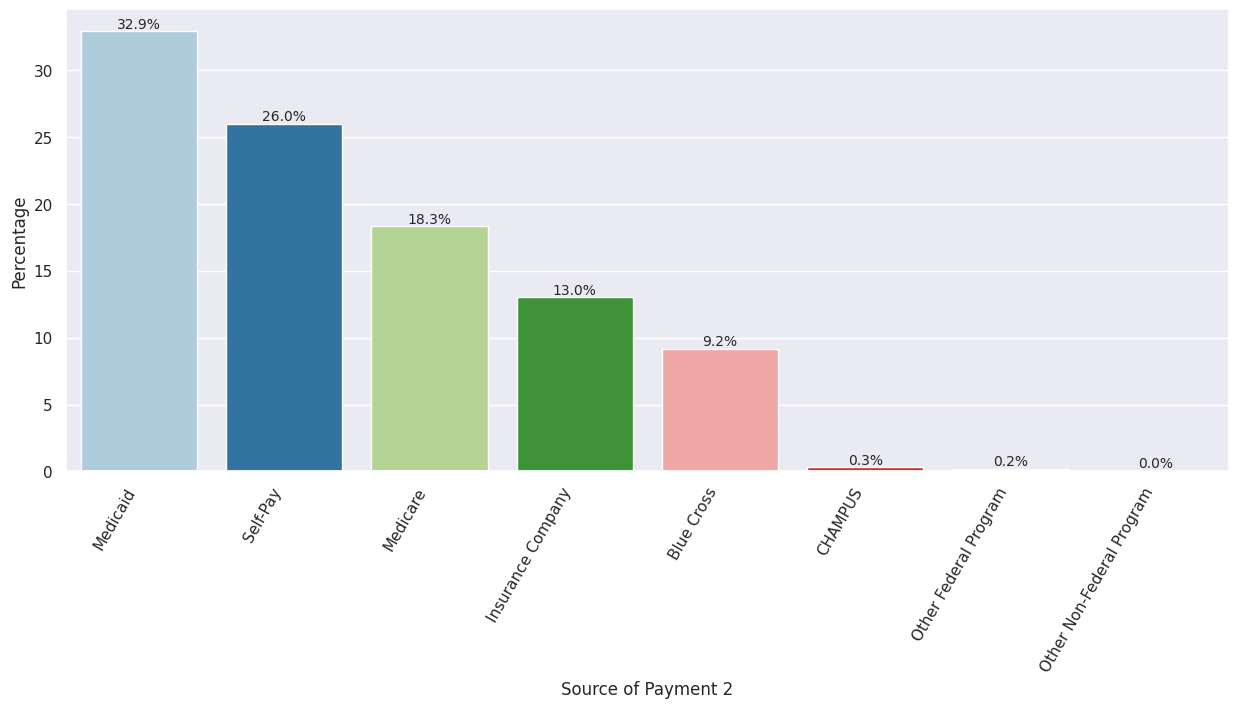

In [134]:
plot_categorical_with_percentage(data, 'Source of Payment 2')

APR Medical Surgical Description        0       1      All
Source of Payment 2                                       
All                               1338017  412583  1750600
Self-Pay                           332576  122574   455150
Medicaid                           472885  102937   575822
Medicare                           243106   77844   320950
Insurance Company                  164783   62959   227742
Blue Cross                         117028   43523   160551
CHAMPUS                              4001    1469     5470
Other Federal Program                2730     778     3508
Other Non-Federal Program             522     261      783
Workers Compensation                  165     177      342
Unknown                               221      61      282
----------------------------------------------------------------------------------------------------


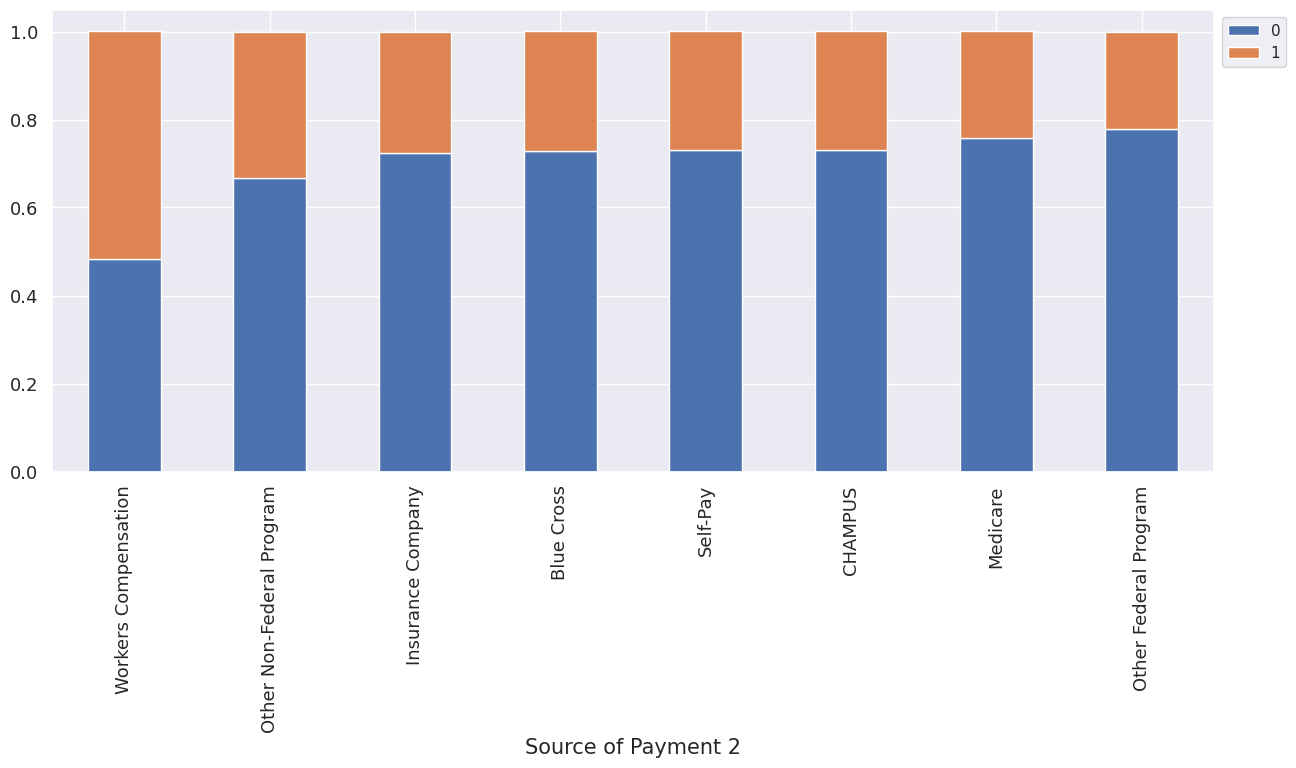

In [135]:
stacked_barplot(data['Source of Payment 2'])

In [136]:
# Impute a new category 'Not Used' for null values in 'Source of Payment 2'
data['Source of Payment 2'].fillna('Not Used', inplace=True)

In [137]:
# Apply the mapping to the 'Source of Payment 2' column
data['Source of Payment 2'] = data['Source of Payment 2'].map(payment_mapping)

In [138]:
data['Source of Payment 2'] = data['Source of Payment 2'].astype('int8')

### **17. Observation on Source of Payment 3**

In [139]:
# Check unique values and their counts
counts = data['Source of Payment 3'].value_counts()
print(counts)

Self-Pay                     392871
Medicaid                      99557
Insurance Company             28567
Medicare                      21698
Blue Cross                    18716
CHAMPUS                        1434
Other Federal Program           452
Unknown                         187
Other Non-Federal Program       141
Workers Compensation             62
Name: Source of Payment 3, dtype: int64


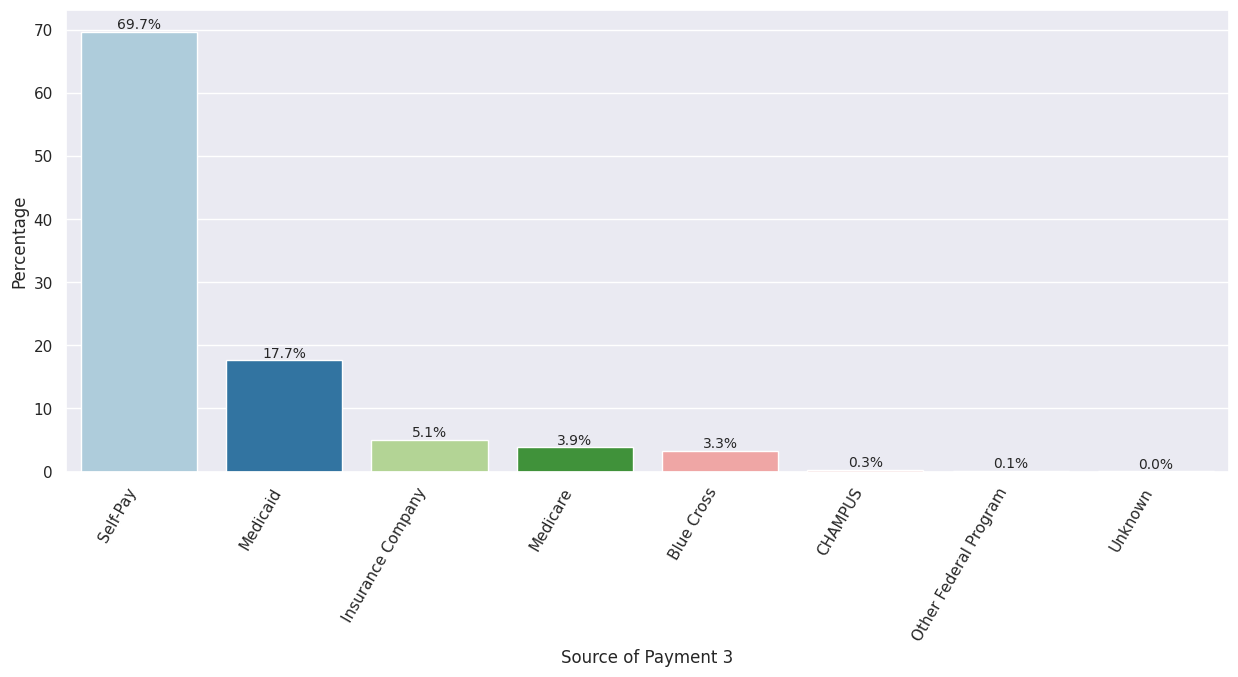

In [140]:
plot_categorical_with_percentage(data, 'Source of Payment 3')

APR Medical Surgical Description       0       1     All
Source of Payment 3                                     
All                               428414  135271  563685
Self-Pay                          291296  101575  392871
Medicaid                           84953   14604   99557
Medicare                           14774    6924   21698
Insurance Company                  21709    6858   28567
Blue Cross                         14051    4665   18716
CHAMPUS                             1020     414    1434
Other Federal Program                317     135     452
Unknown                              139      48     187
Other Non-Federal Program            113      28     141
Workers Compensation                  42      20      62
----------------------------------------------------------------------------------------------------


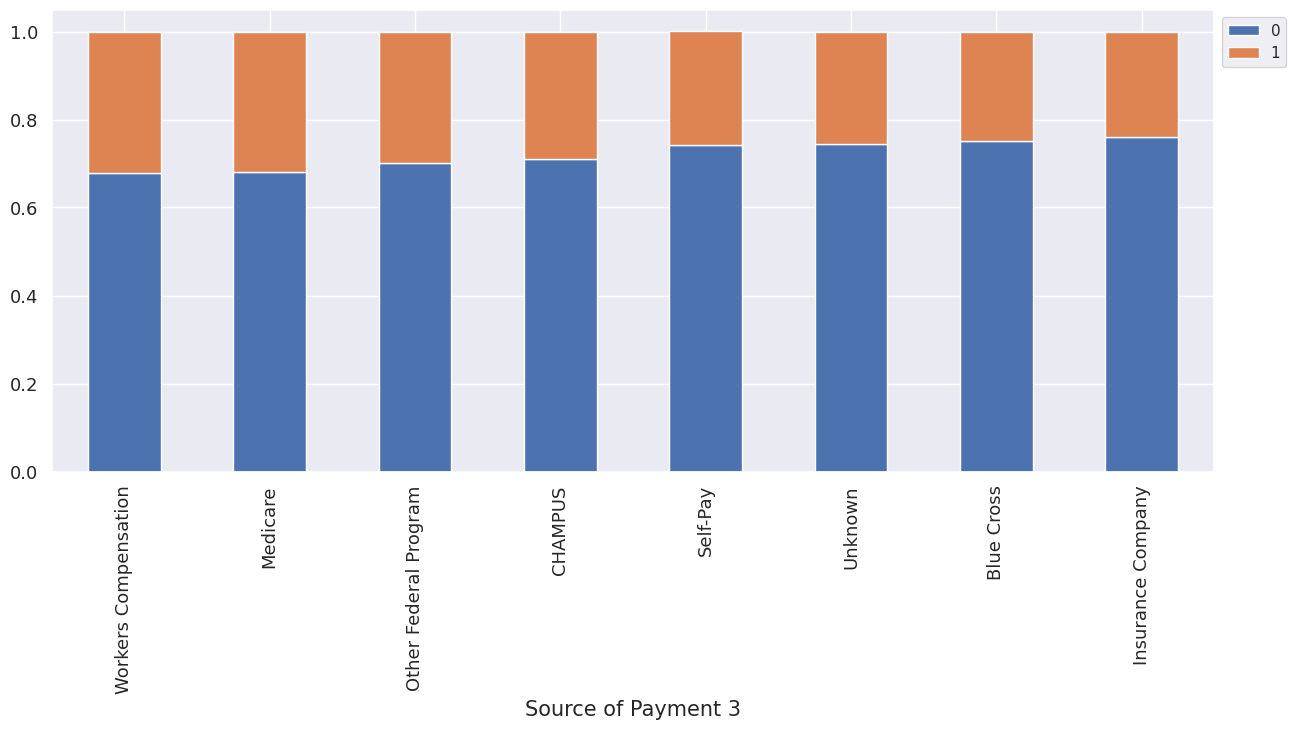

In [141]:
stacked_barplot(data['Source of Payment 3'])

In [142]:
# Impute a new category 'Not Used' for null values in 'Source of Payment 3'
data['Source of Payment 3'].fillna('Not Used', inplace=True)

In [143]:
# Apply the mapping to the 'Source of Payment 3' column
data['Source of Payment 3'] = data['Source of Payment 3'].map(payment_mapping)

In [144]:
data['Source of Payment 3'] = data['Source of Payment 3'].astype('int8')

### **18. Observation on CCS Diagnosis Code**

In [145]:
# Check unique values and their counts
counts = data['CCS Diagnosis Code'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[235732  61337  61202  59890  58906  57278  56468  52866  48084  47063
  43408  42713  41153  39105  38672  38522  38452  37120  37026  36746
  35316  34385  34298  31868  31738  31143  29499  28989  28637  28395
  25802  25161  23698  22565  20725  20171  19406  18711  16911  16858
  16187  15988  15816  15739  15620  14451  14301  14212  13707  12973
  12960  12819  12806  12721  12681  12626  12422  11880  11875  11153
  11019  10883  10633  10596  10411  10131  10117   9821   9570   9552
   9526   9460   9368   9186   9091   8973   8966   8691   8565   8465
   8259   7914   7826   7615   7611   7127   7066   7001   6703   6395
   6322   6298   6209   6101   6050   5736   5620   5296   5250   5211
   5178   5126   5053   5027   4789   4640   4481   4446   4441   4274
   3965   3944   3899   3888   3878   3716   3569   3476   3353   3340
   3336   3281   3248   3231   3229   3113   3052   3049   3039   3009
   2988   2971   2956   2927   2874   2862   2832   2814   2792   2753
   274

In [146]:
# Drop null values
data = data.dropna(subset=['CCS Diagnosis Code'])

In [147]:
data['CCS Diagnosis Code'] = data['CCS Diagnosis Code'].astype(int)

### **19. Observation on CCS Diagnosis Description**

In [148]:
# Check unique values and their counts
counts = data['CCS Diagnosis Description'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[235732  61337  61202  59890  58906  57278  56468  52866  48084  47063
  43408  42713  41153  39105  38672  38522  38452  37120  37026  36746
  35316  34385  34298  31868  31738  31143  29499  28989  28637  28395
  25802  25161  23698  22565  20725  20171  19406  18711  16911  16858
  16187  15988  15816  15739  15620  14451  14301  14212  13707  12973
  12960  12819  12806  12721  12681  12626  12422  11880  11875  11153
  11019  10883  10633  10596  10411  10131  10117   9821   9570   9552
   9526   9460   9368   9186   9091   8973   8966   8691   8565   8465
   8259   7914   7826   7615   7611   7127   7066   7001   6703   6395
   6322   6298   6209   6101   6050   5736   5620   5296   5250   5211
   5178   5126   5053   5027   4789   4640   4481   4446   4441   4274
   3965   3944   3899   3888   3878   3716   3569   3476   3353   3340
   3336   3281   3248   3231   3229   3113   3052   3049   3039   3009
   2988   2971   2956   2927   2874   2862   2832   2814   2792   2753
   274

In [149]:
# Drop the 'CCS Diagnosis Description' column
data = data.drop(columns=['CCS Diagnosis Description'])

### **20. Observation on CCS Procedure Code**

In [151]:
# Check unique values and their counts
counts = data['CCS Procedure Code'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[651203 155473  79643  73836  69901  64437  63981  55362  53772  50170
  50045  46517  40250  38173  35900  35837  30647  30618  29413  24592
  24296  23093  21375  20741  20463  20368  19092  19001  18784  18405
  17589  16311  15093  15045  14821  13866  13162  12982  12542  11679
  11600  10735  10121  10019   9730   9610   9511   9370   9206   9141
   8854   8699   8400   7845   7720   7398   7032   6594   6587   6511
   6360   6203   6147   6133   6075   5866   5815   5760   5635   5470
   5363   5288   5275   5183   5148   5105   5087   5054   5043   4960
   4848   4764   4760   4671   4582   4270   4231   4125   4072   4062
   3895   3820   3805   3793   3686   3635   3584   3526   3475   3438
   3314   3304   3293   3286   3196   3125   3111   2955   2954   2915
   2904   2791   2769   2752   2730   2687   2676   2538   2507   2417
   2398   2313   2271   2266   2159   2158   2138   2132   1968   1885
   1818   1696   1599   1517   1510   1445   1443   1438   1405   1364
   131

In [152]:
data['CCS Procedure Code'] = data['CCS Procedure Code'].astype(int)

### **21. Observation on CCS Procedure Description**

In [153]:
# Check unique values and their counts
counts = data['CCS Procedure Description'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[651203 155473  79643  73836  69901  64437  63981  55362  53772  50170
  50045  46517  40250  38173  35900  35837  30647  30618  29413  24592
  24296  23093  21375  20741  20463  20368  19092  19001  18784  18405
  17589  16311  15093  15045  14821  13866  13162  12982  12542  11679
  11600  10735  10121  10019   9730   9610   9511   9370   9206   9141
   8854   8699   8400   7845   7720   7398   7032   6594   6587   6511
   6360   6203   6147   6133   6075   5866   5815   5760   5635   5470
   5363   5288   5275   5183   5148   5105   5087   5054   5043   4960
   4848   4764   4760   4671   4582   4270   4231   4125   4072   4062
   3895   3820   3805   3793   3686   3635   3584   3526   3475   3438
   3314   3304   3293   3286   3196   3125   3111   2955   2954   2915
   2904   2791   2769   2752   2730   2687   2676   2538   2507   2417
   2398   2313   2271   2266   2159   2158   2138   2132   1968   1885
   1818   1696   1599   1517   1510   1445   1443   1438   1405   1364
   131

In [154]:
# Drop the 'CCS Procedure Description' column
data = data.drop(columns=['CCS Procedure Description'])

### **22. Observation on APR DRG Code**

In [155]:
# Check unique values and their counts
counts = data['APR DRG Code'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[206500 149289  79937  56574  52104  50230  47453  41406  39382  39077
  36505  35614  34475  31787  31179  30345  29626  29385  28828  27927
  25843  25828  25701  25302  24209  24141  22710  22046  20815  20508
  19985  18801  18669  18185  17276  16946  16690  16659  16596  16557
  15843  15451  15255  14953  14896  13911  13670  13141  12759  12735
  12661  12622  12580  12518  12118  11889  11628  11557  11451  11430
  11412  11306  10703  10494  10240  10109  10025   9844   9629   9414
   9236   9038   8980   8703   8701   8649   8628   8551   8397   8308
   8280   8216   8115   8110   7888   7556   7528   7312   7259   7166
   7083   6859   6702   6644   6551   6459   6002   5936   5933   5857
   5846   5695   5630   5621   5485   5458   5449   5433   5428   5415
   5402   5382   5285   5156   5137   5081   5054   5045   4948   4903
   4826   4642   4629   4603   4564   4490   4390   4316   4292   4233
   4144   4081   4025   4014   4001   3992   3991   3938   3877   3876
   385

In [156]:
data['APR DRG Code'] = data['APR DRG Code'].astype(int)

### **23. Observation on APR DRG Description**

In [157]:
# Check unique values and their counts
counts = data['APR DRG Description'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[206500 149289  79937  56574  52104  50230  47453  41406  39382  39077
  36505  35614  34475  31787  31179  30345  29626  29385  28828  27927
  25843  25828  25701  25302  24209  24141  22710  22046  20815  20508
  19985  18801  18669  18185  17276  16946  16690  16659  16596  16557
  15843  15451  15255  14953  14896  13911  13670  13141  12759  12735
  12661  12622  12580  12518  12118  11889  11628  11557  11451  11430
  11412  11306  10703  10494  10240  10109  10025   9844   9629   9414
   9236   9038   8980   8703   8701   8649   8628   8551   8397   8308
   8280   8216   8115   8110   7888   7556   7528   7312   7259   7166
   7083   6859   6702   6644   6551   6459   6002   5936   5933   5857
   5846   5695   5630   5621   5485   5458   5449   5433   5428   5415
   5402   5382   5285   5156   5137   5081   5054   5045   4948   4903
   4826   4642   4629   4603   4564   4490   4390   4316   4292   4233
   4144   4081   4025   4014   4001   3992   3991   3938   3877   3876
   385

In [158]:
# Drop the column
data = data.drop(columns=['APR DRG Description'])

### **24. Observation on APR MDC Code**

In [159]:
# Check unique values and their counts
counts = data['APR MDC Code'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[384751 262811 240566 226626 216076 191089 143556 118188 107262  87673
  85423  75639  72301  66967  52116  41645  37908  35319  31237  23746
  12630  10967   4524   3753   2417]


In [160]:
data['APR MDC Code'] = data['APR MDC Code'].astype(int)

### **25. Observation on APR MDC Description**

In [161]:
# Check unique values and their counts
counts = data['APR MDC Description'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[384751 262811 240566 226626 216076 191089 143556 118188 107262  87673
  85423  75639  72301  66967  52116  41645  37908  35319  31237  23746
  12630  10967   4524   3753   2417]


In [162]:
# Drop the column
data = data.drop(columns=['APR MDC Description'])

### **26. Observation on APR Severity of Illness Code**

In [163]:
# Check unique values and their counts
counts = data['APR Severity of Illness Code'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[940430 930845 514581 149334]


In [164]:
data['APR Severity of Illness Code'] = data['APR Severity of Illness Code'].astype(int)

### **27. Observation on APR Severity of Illness Description**

In [165]:
# Check unique values and their counts
counts = data['APR Severity of Illness Description'].value_counts().tolist()
counts = np.array(counts)
print(counts.T)

[940430 930845 514581 149334]


In [166]:
# Drop the column
data = data.drop(columns=['APR Severity of Illness Description'])

### **28. Observation on Abortion Edit Indicator**

In [167]:
# Check unique values and their counts
counts = data['Abortion Edit Indicator'].value_counts()
print(counts)

N    2535190
Name: Abortion Edit Indicator, dtype: int64


In [168]:
data = data.drop(columns=['Abortion Edit Indicator'])

### **29. Emergency Department Indicator**

In [169]:
# Check unique values and their counts
counts = data['Emergency Department Indicator'].value_counts()
print(counts)

Y    1439939
N    1095251
Name: Emergency Department Indicator, dtype: int64


In [170]:
data['Emergency Department Indicator'] = label_encoder.fit_transform(data['Emergency Department Indicator'])

data['Emergency Department Indicator'] = data['Emergency Department Indicator'].astype('int8')

In [171]:
data = data.drop(columns=['Operating Provider License Number' , 'Other Provider License Number'])

**Convert the datatypes of whole dataframe.**

In [172]:
data_new = data.convert_dtypes()

In [173]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535190 entries, 5 to 2617244
Data columns (total 30 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   index                                     Int64  
 1   Health Service Area                       Int64  
 2   Hospital County                           Int64  
 3   Operating Certificate Number              Int64  
 4   Facility ID                               Int64  
 5   Facility Name                             Int64  
 6   Age Group                                 Int64  
 7   Zip Code - 3 digits                       Int64  
 8   Gender                                    Int64  
 9   Race                                      Int64  
 10  Ethnicity                                 Int64  
 11  Length of Stay                            Int64  
 12  Type of Admission                         Int64  
 13  Patient Disposition                       Int8   
 14  CC

# **4. Feature Selection**

### **1. Correlation Coefficient**

<Axes: >

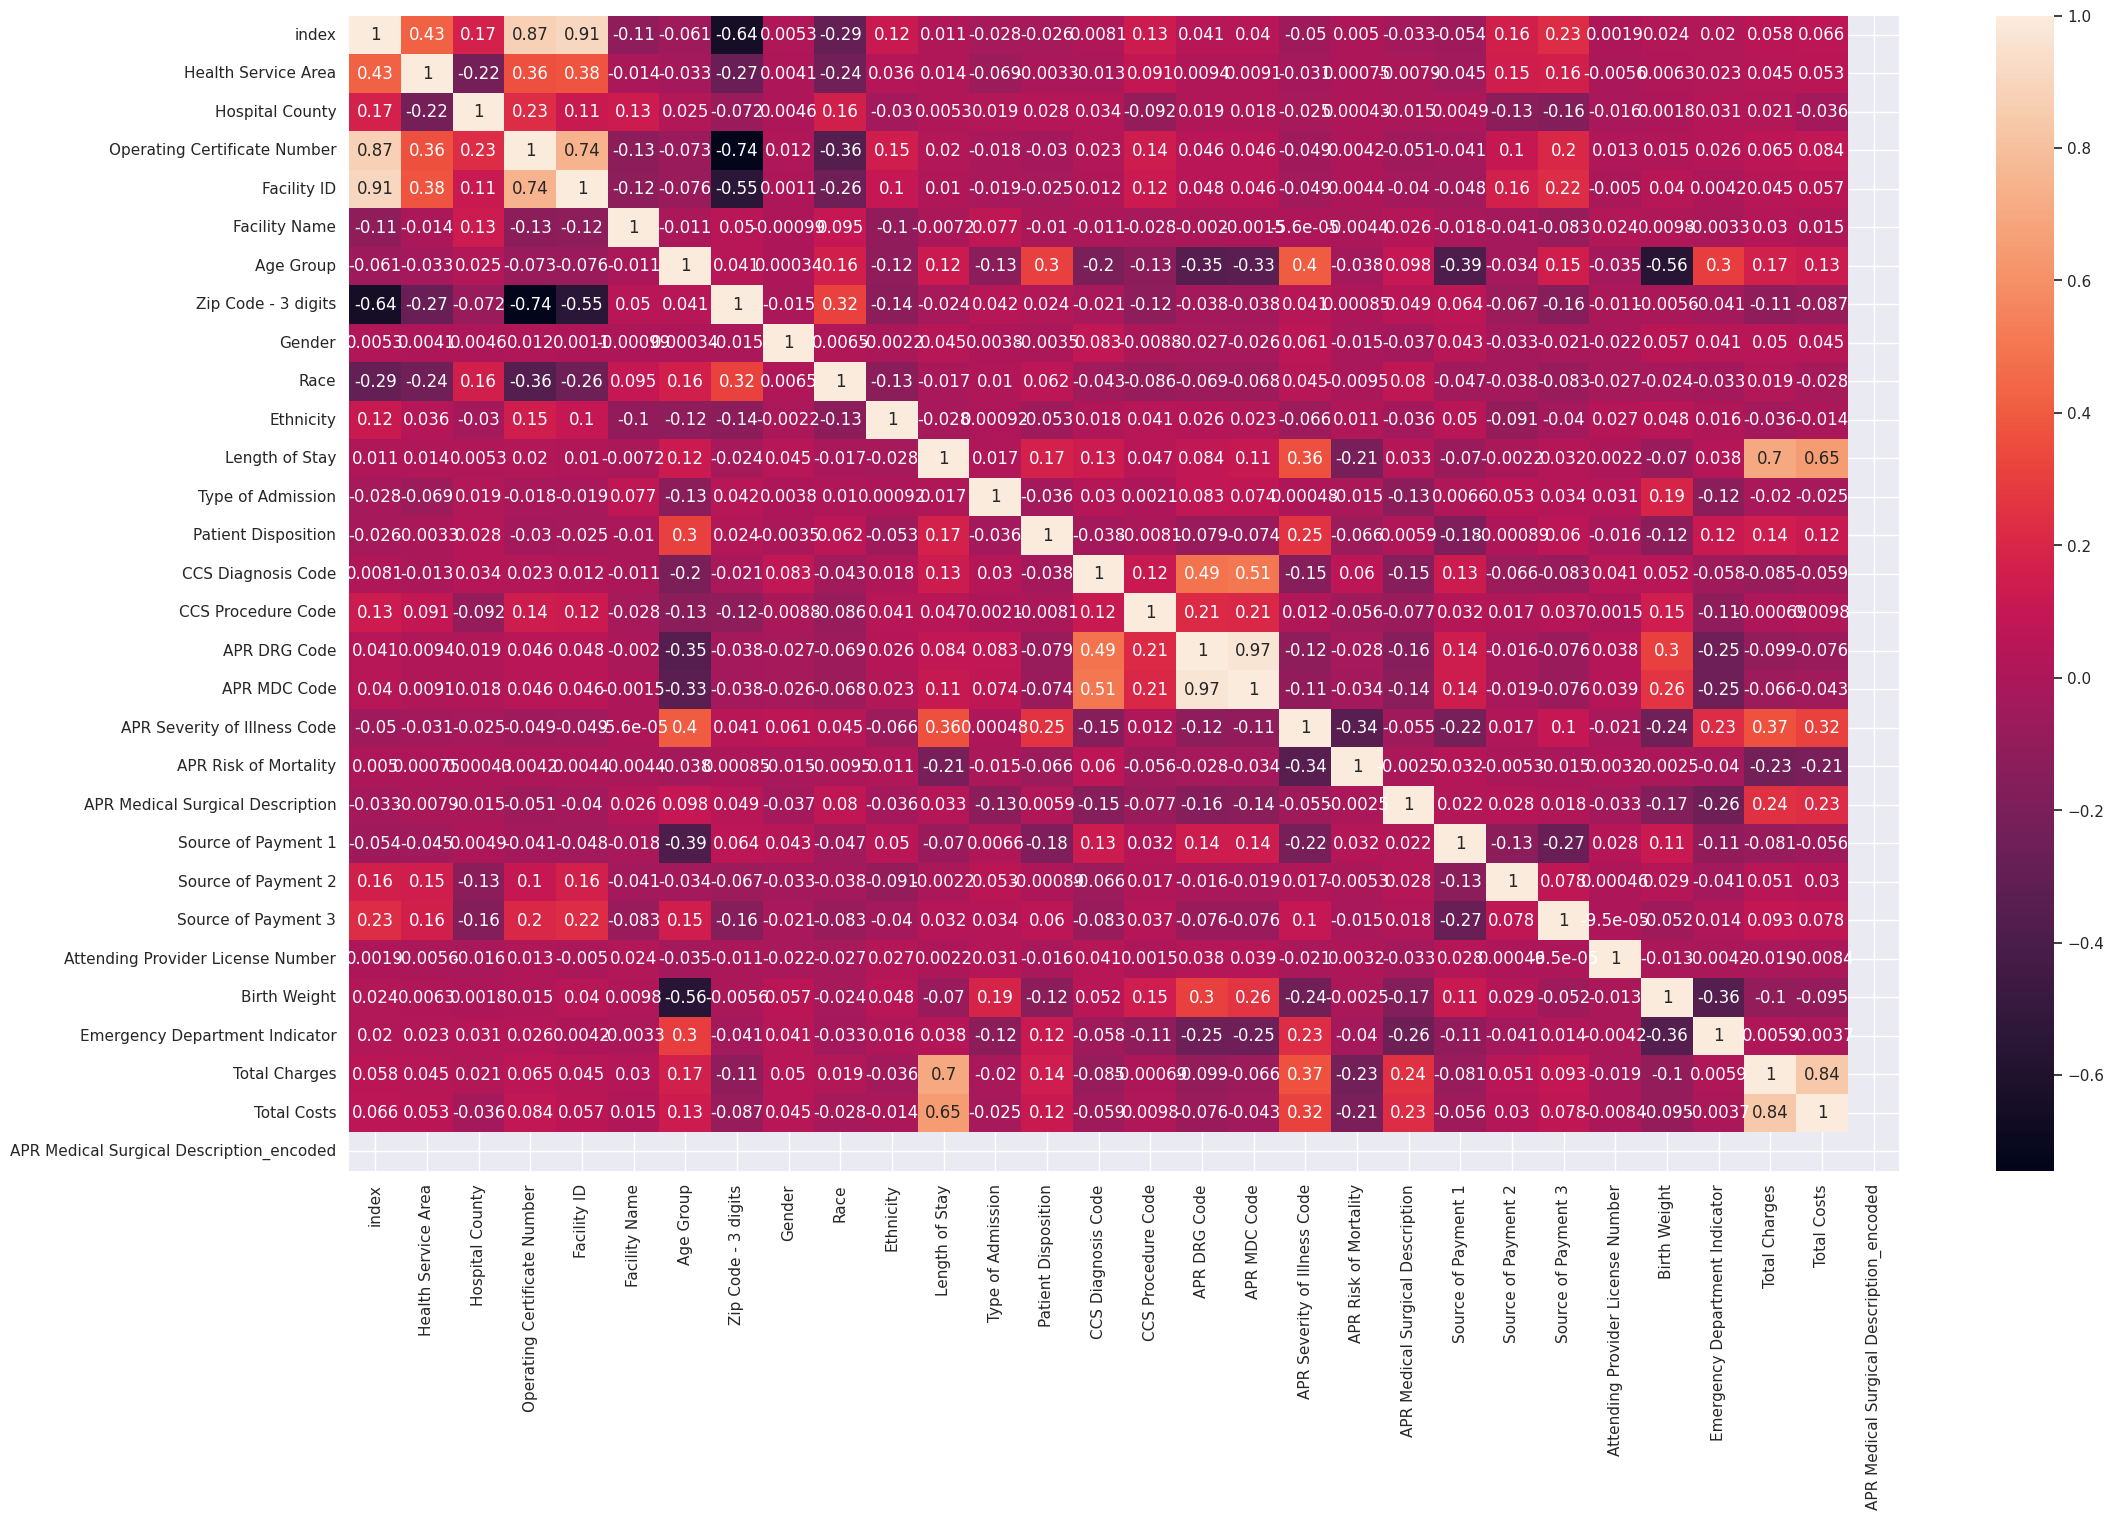

In [174]:
# Correlation matrix
cor = data_new.corr()

# Plotting Heatmap
plt.figure(figsize = (25,15))
sns.heatmap(cor, annot = True)

### **2. Information Gain**

In [152]:
X = data_new.drop(columns=['APR Medical Surgical Description'])  # Features (excluding target column)
y = data_new['APR Medical Surgical Description']  # Target column

In [175]:
selector = SelectKBest(score_func=mutual_info_classif, k=17)  # Select top 15 features
X_new = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

In [176]:
print(selected_features)

Index(['index', 'Health Service Area', 'Age Group', 'Gender', 'Race',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'Source of Payment 1', 'Attending Provider License Number',
       'Emergency Department Indicator', 'Total Costs'],
      dtype='object')


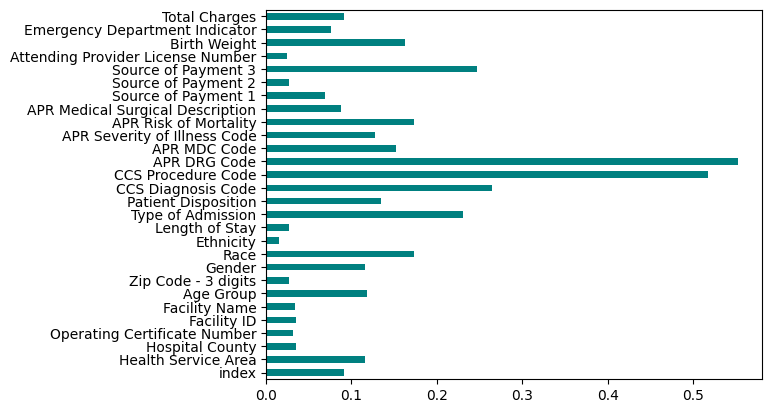

In [132]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, data_new.columns[0:len(data_new.columns)-1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [133]:
data_new = data_new.reset_index(drop=True)

# **5. Building the Model**

In [175]:
data1 = data_new[['index', 'Health Service Area', 'Age Group', 'Gender', 'Race',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'Source of Payment 1', 'Attending Provider License Number',
       'Emergency Department Indicator', 'Total Costs', 'APR Medical Surgical Description']]

In [176]:
x = data1.drop(columns=['APR Medical Surgical Description'])  # Features
y = data1['APR Medical Surgical Description']  # Target column

In [177]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [180]:
def get_metrics_score(model, trainx, testx, trainy, testy, flag=True):
    '''
    model : classifier to predict values of x

    '''
    # defining an empty list to store train and test results
    score_list = []

    train_pred = model.predict(trainx)
    test_pred = model.predict(testx)

    train_acc = model.score(trainx,trainy)
    test_acc = model.score(testx,testy)

    train_recall = metrics.recall_score(trainy,train_pred)
    test_recall = metrics.recall_score(testy,test_pred)

    train_precision = metrics.precision_score(trainy,train_pred)
    test_precision = metrics.precision_score(testy,test_pred)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(trainx,trainy))
        print("Accuracy on test set : ",model.score(testx,testy))
        print("Recall on training set : ",metrics.recall_score(trainy,train_pred))
        print("Recall on test set : ",metrics.recall_score(testy,test_pred))
        print("Precision on training set : ",metrics.precision_score(trainy,train_pred))
        print("Precision on test set : ",metrics.precision_score(testy,test_pred))

    return score_list   # returning the list with train and test scores

In [181]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of x
    y_actual : ground truth

    '''
    y_predict = model.predict(x_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Medical","Actual - Surgical"]],
                  columns = [i for i in ['Predicted - Medical','Predicted - Surgical']])
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### **1. Logistic Regression**

In [182]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [183]:
y_pred = lr.predict(x_test)

Accuracy on training set :  0.7819448443706389
Accuracy on test set :  0.7813004153534844
Recall on training set :  0.12677360383409916
Recall on test set :  0.12722197486043085
Precision on training set :  0.6227076078927931
Precision on test set :  0.6238401142041399


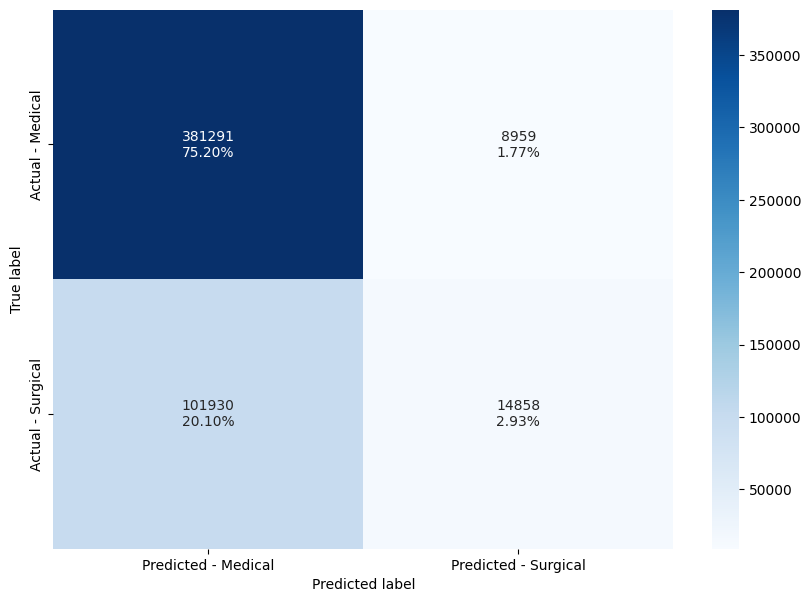

In [184]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,x_train,x_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

### **2. Bagging and Boosting**

#### Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV

* Stratified K-Folds cross-validator provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [185]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "DTREE",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("decision_tree", DecisionTreeClassifier(random_state=1)),]
        ),
    )
)

models.append(
    (
        "Bagging",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("bagging", BaggingClassifier(random_state=1)),]
        ),
    )
)

models.append(
    (
        "XGB",
        Pipeline(
            steps=[("scaler", StandardScaler()),
                   ("xgboost", XGBClassifier(random_state=1)),]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score

for name, model in models:
    scoring = 'recall'
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=x_train, y=y_train, scoring=scoring, cv=kfold)
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

DTREE: 99.80043265439478
Bagging: 99.7886175727259
XGB: 99.85821909842383


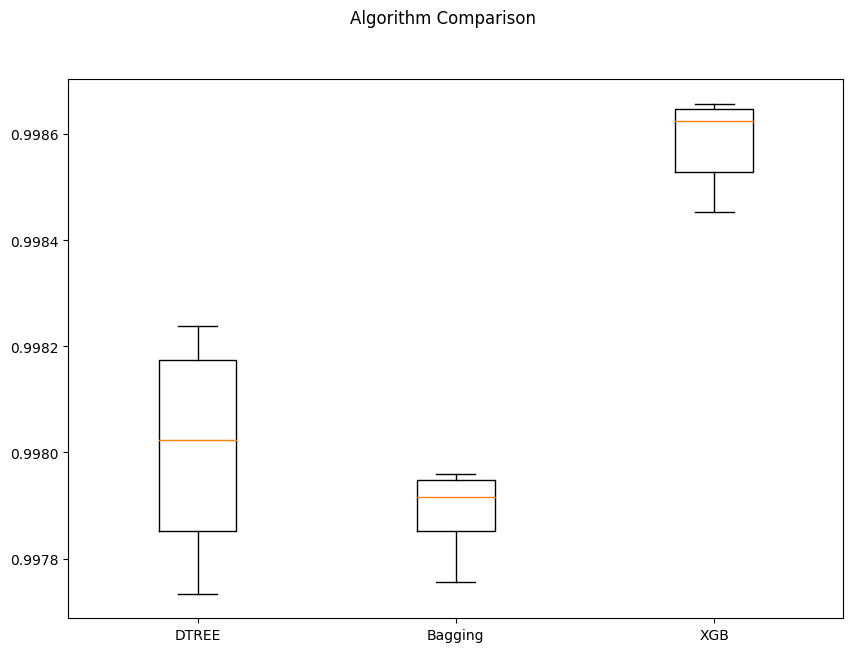

In [186]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10,7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* We can see that XGBoost is giving the highest cross validated recall.